In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

D:\Program_Files\anaconda3\envs\dx_env\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
rfm=pd.read_csv('./rfm.csv', index_col=0)
rfm.shape

(2230797, 3)

In [3]:
#display(rfm)
rfm.describe()

,Frequency,MonetaryValue,Duration
count,2.230797e+06,2.230797e+06,2.230797e+06
mean,2.376098e+02,7.008404e+06,1.050894e+01
std,2.375453e+02,8.060360e+06,2.708955e+00
min,1.000000e+00,1.000000e+02,1.000000e+00
25%,5.900000e+01,2.033140e+06,1.000000e+01
50%,1.490000e+02,4.661516e+06,1.200000e+01
75%,3.430000e+02,8.684494e+06,1.200000e+01
max,1.041000e+03,9.578380e+07,1.200000e+01


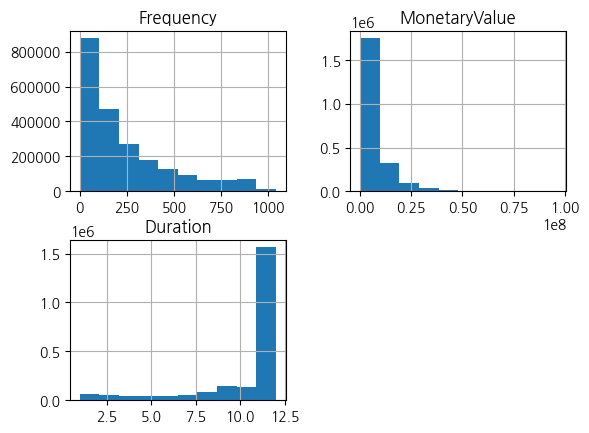

In [4]:
#hist
rfm.hist(); 
#전체 컬럼에서 왼쪽으로 치우친 형태를 보이며 이상치를 보유한 것으로 보임.
#정규분포 형태로 변환해주면 모델이 더 나은 성능을 보이는데 도움이 됨. 
#정규분포 형태로 만들어주기 위해 변환.

In [5]:
#왼쪽으로 치우쳐 있기 때문에 로그변환 
rfm_log = np.log(rfm)
rfm_log.describe()
#원래값으로 복원시 exp 

,Frequency,MonetaryValue,Duration
count,2.230797e+06,2.230797e+06,2.230797e+06
mean,4.826847e+00,1.516523e+01,2.290098e+00
std,1.345276e+00,1.256397e+00,4.211979e-01
min,0.000000e+00,4.605170e+00,0.000000e+00
25%,4.077537e+00,1.452509e+01,2.302585e+00
50%,5.003946e+00,1.535485e+01,2.484907e+00
75%,5.837730e+00,1.597705e+01,2.484907e+00
max,6.947937e+00,1.837760e+01,2.484907e+00


In [6]:
np.log1p(rfm).describe()
##원래값으로 복원시 exp한 뒤 +1

,Frequency,MonetaryValue,Duration
count,2.230797e+06,2.230797e+06,2.230797e+06
mean,4.851531e+00,1.516523e+01,2.396875e+00
std,1.300603e+00,1.256392e+00,3.500199e-01
min,6.931472e-01,4.615121e+00,6.931472e-01
25%,4.094345e+00,1.452509e+01,2.397895e+00
50%,5.010635e+00,1.535485e+01,2.564949e+00
75%,5.840642e+00,1.597705e+01,2.564949e+00
max,6.948897e+00,1.837760e+01,2.564949e+00


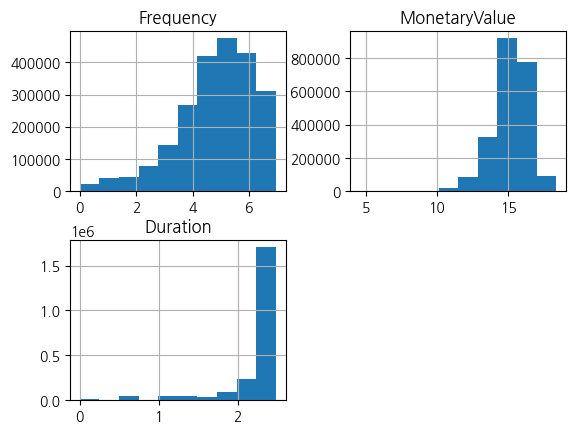

In [7]:
rfm_log.hist();
#로그 변환을 해도 여전치 치우친 형태가 나타났기 때문에 robust(이상치에 강건) scale을 고려

In [ ]:
#현 단계에서는 스케일러보다는 제곱, 지수, 박스콕스, 여존슨 등의 변환을 사용함. 
#왼쪽으로 치우쳤기 때문에 로그, 루트(제곱근), 역수변환, 박스콕스, 여존슨 등의 변환을 고려함. 

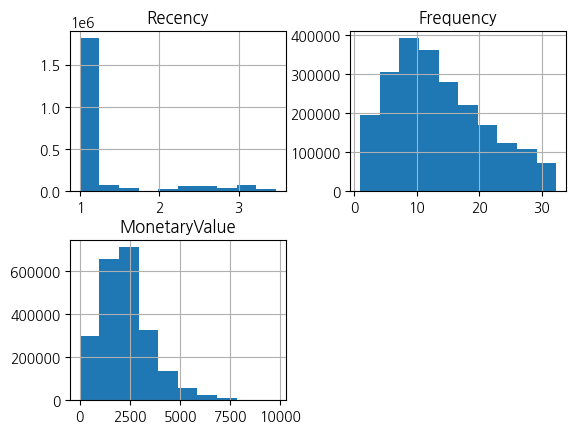

In [65]:
#루트(제곱근 변환)
np.sqrt(rfm).hist();

In [96]:
#박스콕스 변환과 여존슨 변환(보류)
#https://bommbom.tistory.com/entry/%EB%B0%95%EC%8A%A4%EC%BD%95%EC%8A%A4-%EC%97%AC%EC%A1%B4%EC%8A%A8-%EB%B3%80%ED%99%98#google_vignette

#ln
#https://www.wikihow.com/Get-Rid-of-Ln

#자연로그(ln)의 역산=ln의 지수=exp
#np.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
np.exp(2) #exp 2제곱  #np.exp(1)은 2.718281828459045

#로그변환한 데이터를 되돌릴 때 


#np.log1p()를 쓰는 이유
#https://suppppppp.github.io/posts/Why-Series-MDM-1/
#np.log1p(df) #로그변환
#0을 np.log하면 -inf값이 나옴.
#그래서 로그변환시 0에+1을 해주게 되는건데 이때 np.log1p를 써주면 -inf가 출력되지 않고 0이 출력된다. 
#np.log(1+기존값) = np.log1p(기존값)

7.38905609893065

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

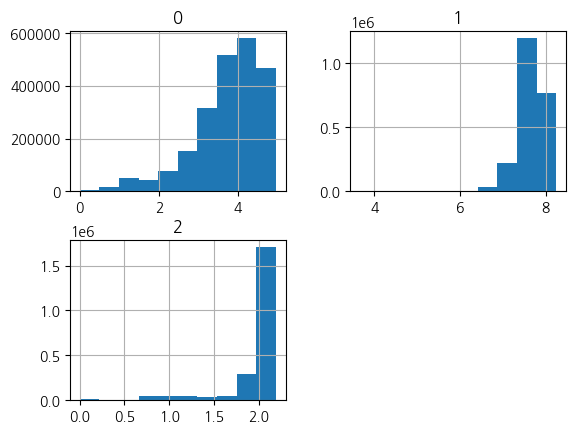

In [8]:
#box cox 변환
from scipy import stats
#box cox 변환을 하기 위해선 df를 1차원 배열로 변환해줘야 함. 
#데이터도 양수여야함. 

#rfm.values #array([[1.000000e+00, 1.270000e+02, 3.262344e+06],[1.000000e+00, 1.740000e+02, 5.604157e+06],...]
#rfm.values.ravel() #일차원으로 #[1.000000e+00, 1.270000e+02, 3.262344e+06, ..., 8.000000e+00,...]
bc=stats.boxcox(rfm.values.ravel())
#bc[0].shape #0번째가 변환된 값들의 1d array이고 1번째 값이 lambda 값

#역변환 하려면 
# def inverse_boxcox(bc[0], bc[1]):#변환된 array, lambda
#     if bc[0] ==0:
#         return np.exp(bc[0])
#     else:
        #return np.power(bc[1]) 이게 맞나 확인해봐야 함. (보류)

#정규화된 결과 확인
pd.DataFrame(bc[0].reshape(-1,3)).hist()
#cox box 변환도 정규화가 잘 되는것 같지는 않음. 

In [9]:
#분포의 형태 바꾸기
#치우침 감소, 이상치 영향 감소
rfm_root=np.sqrt(rfm)
#Mimmax, standard 스케일링 등으로 데이터의 크기 범위를 바꿈 

#minmax 스케일의 경우 값을 0에서 1사이로 정규화해 크기 차이를 제거
#standard 스케일의 경우 평균은 0이고 표준편차는 1로 맞춰 중심화 및 분산 정규화 

#현재 데이터의 경우 왼쪽으로 치우치고 이상치가 존재해서 제곱근으로 변환하고 
#거리기반 모델인 KNN을 할 예정이므로 추가적으로 스케일링을 할 예정 
#파라미터의 변화에 민감한 모델(SGD, MLP등)의 경우 스케일 조정이 없으면 학습이 불안정 

#정규분포화는 데이터의 극단값을 줄여 회귀, 거리 기반 모델에서 이상치가 모델을 왜곡시키는 문제를 완화

#많은 모델은 내부적으로 정규분포를 가정
#모델	                            정규분포가 유리한 이유
#선형 회귀	                        오차항이 정규분포일수록 추정량이 가장 효율(OLS 가정)
#로지스틱 회귀	                    입력 특성이 정규분포면 파라미터 추정 안정
#LDA (Linear Discriminant Analysis)	클래스별 분포가 정규분포일수록 성능 극대화
#나이브 베이즈	                    각 특성의 분포가 정규라는 전제 있음 (Gaussian NB)

#정분포처럼 중심에 밀집된 분포는 loss surface가 부드럽고 둥글어져서 모델 학습시 경사가 급변하지 않고 안정적으로 수렴
#-> 특히 신경망, 로지스틱 회귀, 선형 회귀에서 정규분포화가 성능 향상에 실질적으로 기여 

#해석 가능성 개선
#로그변환 등으로 정규 분포에 가까우면 변수간 관계(선형성, 다중공선성 등)이 더 명확히 드러남.
#데이터의 분포를 정규분포에 가깝게 변환하면 회귀모델에서는 선형성 가정을 더 잘 만족하게 됨. 

#정규화(크기정리)와 정규분포화(모양 정리)를 잘 구분해서 이해할 것. 

In [102]:
#정규분포화를 했을 때 로그변환과 제곱근 변환이 가장 정규분포에 가까웠음.
#rfm데이터 수가 50개를 넘어서기 때문에 ks검정으로 정규분포에 얼마나 가까운지 검정 

,Recency,Frequency,MonetaryValue
발급회원번호,,,
SYN_0,1,127.0,3262344.0
SYN_1,1,174.0,5604157.0
SYN_2,1,29.0,757181.0
SYN_3,1,40.0,468022.0
SYN_4,12,30.0,673648.0
...,...,...,...
SYN_2999991,1,454.0,5315944.0
SYN_2999996,1,458.0,5383214.0
SYN_2999997,1,287.0,9660844.0


In [ ]:
#Anderson-Darling 검정법
#콜모고로프-스미르노프 검정(K-S검정)을 수정한 적합도 검정으로 특정분포의 꼬리(tail)에 K-S 검정보다 가중치를 더 두어 수행
#Anderson-Darling 검정은 검정할 특정 분포의 모수가 없다고 가정하여 수행
#Anderson-Darling 검정은 여러 분포의 적합도 검정을 수행할 수 있지만 정규성을 검정하는 데 강력
#https://m.blog.naver.com/pmw9440/221722254846

#귀무가설: 데이터는 특정 분포를 따른다.

# from scipy.stats import anderson

# result = anderson(data, dist='norm')
# print(f"Anderson-Darling Test statistic = {result.statistic:.4f}")

# for i in range(len(result.critical_values)):
#     sl = result.significance_level[i]
#     cv = result.critical_values[i]
#     status = "정규성 만족" if result.statistic < cv else "정규성 불만족"
#     print(f"Significance Level {sl}%: Critical Value = {cv:.4f} → {status}")

In [119]:
#D’Agostino and Pearson’s Test 다구스티노 피어슨 검정
# 왜도와 첨도의 정규분포와 일치하는 지를 판단하는 검정방법
#https://blog.naver.com/pmw9440/221984027319
#귀무가설: 데이터가 정규분포를 따른다. 

from scipy.stats import normaltest
for now in rfm_log.columns:
    stat, p = normaltest(rfm_log[now])
    print(f"D'Agostino Test: statistic={stat:.4f}, p-value={p:.4f}")
    print(now)
    if p > 0.05:
        print("정규분포일 가능성이 높습니다.")
    else:
        print("정규분포가 아닐 가능성이 큽니다.")


D'Agostino Test: statistic=795630.7703, p-value=0.0000
Recency
정규분포가 아닐 가능성이 큽니다.
D'Agostino Test: statistic=226917.5031, p-value=0.0000
Frequency
정규분포가 아닐 가능성이 큽니다.
D'Agostino Test: statistic=360057.1334, p-value=0.0000
MonetaryValue
정규분포가 아닐 가능성이 큽니다.


In [120]:
from scipy.stats import normaltest
for now in rfm_root.columns:
    stat, p = normaltest(rfm_root[now])
    print(f"D'Agostino Test: statistic={stat:.4f}, p-value={p:.4f}")
    print(now)
    if p > 0.05:
        print("정규분포일 가능성이 높습니다.")
    else:
        print("정규분포가 아닐 가능성이 큽니다.")

D'Agostino Test: statistic=946392.5207, p-value=0.0000
Recency
정규분포가 아닐 가능성이 큽니다.
D'Agostino Test: statistic=151464.1025, p-value=0.0000
Frequency
정규분포가 아닐 가능성이 큽니다.
D'Agostino Test: statistic=375604.1150, p-value=0.0000
MonetaryValue
정규분포가 아닐 가능성이 큽니다.


예시


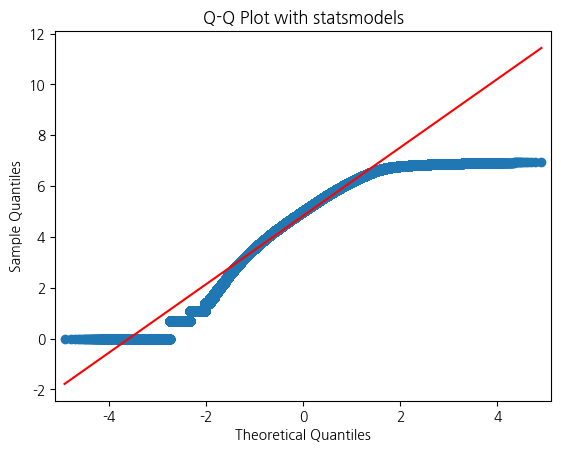

In [121]:
#검정기법으로 판단하기 어려워 QQ plot 사용 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q Plot
# stats.probplot(rfm_root['Frequency'], dist="norm", plot=plt)
# plt.title("Q-Q Plot")
# plt.xlabel("Theoretical Quantiles (Normal)")
# plt.ylabel("Sample Quantiles")
# plt.show()

import statsmodels.api as sm
print('예시')
sm.qqplot(rfm_log['Frequency'], line='s')  # 's'는 standardized line
plt.title("Q-Q Plot with statsmodels")
plt.show()

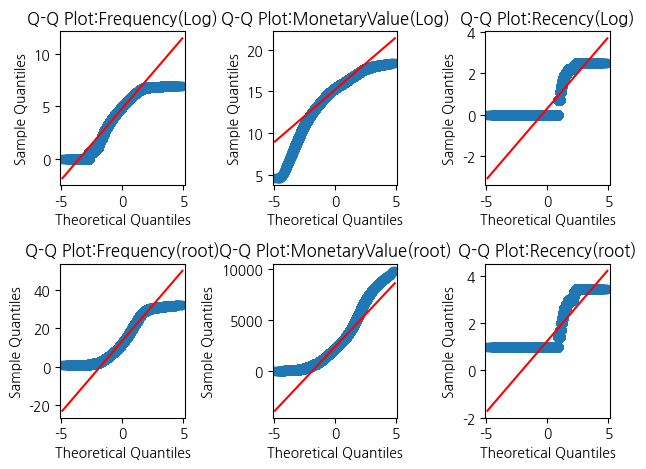

In [122]:
#오래걸림
fig,axes = plt.subplots(nrows=2, ncols=3)#, figsize=(,))

sm.qqplot(rfm_log['Frequency'], line='s', ax=axes[0,0] )  
axes[0,0].set_title("Q-Q Plot:Frequency(Log)")

sm.qqplot(rfm_log['MonetaryValue'], line='s', ax=axes[0,1] ) 
axes[0,1].set_title("Q-Q Plot:MonetaryValue(Log)")

sm.qqplot(rfm_log['Recency'], line='s', ax=axes[0,2] )  
axes[0,2].set_title("Q-Q Plot:Recency(Log)")

sm.qqplot(rfm_root['Frequency'], line='s', ax=axes[1,0] )  
axes[1,0].set_title("Q-Q Plot:Frequency(root)")

sm.qqplot(rfm_root['MonetaryValue'], line='s', ax=axes[1,1] ) 
axes[1,1].set_title("Q-Q Plot:MonetaryValue(root)")

sm.qqplot(rfm_root['Recency'], line='s', ax=axes[1,2] )  
axes[1,2].set_title("Q-Q Plot:Recency(root)")

plt.tight_layout()
plt.show()

#log변환한 데이터가 더 정규분포에 가까운 듯 하다. 

In [ ]:
#정규화

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# pipeline = Pipeline([
#     ('scaler', StandardScaler()), #초기 스케일러
#     ('model', LogisticRegression()) #모델
# ])

# param_grid = {'scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()]}

# grid = GridSearchCV(pipeline, param_grid, cv=5)
# grid.fit(x,y)


In [7]:
#Minmax와 standard 스케일러는 분포 모양을 유지하면서 값의 범위를 조정하는데 초점이 맞춰져있음. 
#robust scaler는 왜도를 해결하기보다 이상치나 극단값의 영향을 줄이는데 효과가 있음. 
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()

#train과 test로 나누지 않아서 fit_transform으로 바로 진행
rfm_ss = ss.fit_transform(rfm_log)
rfm_mm = mm.fit_transform(rfm_log)
rfm_rb = rb.fit_transform(rfm_log)


In [8]:
#스케일러 반환값이 np.array형태로 나오는데 이런 형태는 describe나 hist 같은 pandas 메소드를 사용하기 어려움
X=pd.DataFrame(rfm_rb, columns= rfm_log.columns)
X.describe()

,Frequency,MonetaryValue,Duration
count,2.230797e+06,2.230797e+06,2.230797e+06
mean,-1.006134e-01,-1.305958e-01,-1.068490e+00
std,7.642776e-01,8.653124e-01,2.310193e+00
min,-2.842840e+00,-7.403577e+00,-1.362925e+01
25%,-5.263110e-01,-5.714762e-01,-1.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.736890e-01,4.285238e-01,0.000000e+00
max,1.104419e+00,2.081846e+00,0.000000e+00


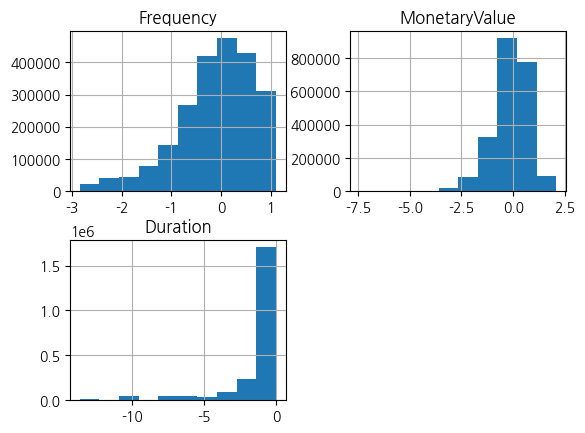

In [13]:
X.hist();

In [9]:
#기존에 데이터가 너무 커서 Kmeans로 학습하기엔 너무 오랜시간이 걸려 minibatchkmeans고려
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
#kmeans = KMeans(n_init='auto', random_state=0)
#난수를 0으로 고정해 매번 학습시 동일한 초기 중심점에서 시작하게 함 (재현성 보장) 
#kmeans.fit(X)
#kmeans.cluster_centers_, kmeans.inertia_ #클러스터의 센터값, 클러스터의 inertia값 
#클러스터의 센터값 좌표는 3차원으로 클러스터 내 거리합이 작을수록 데이터들이 중심에 가깝게 모여있음을 의미. 
#inertia(이너셔//클러스터 중심과 클러스터에 속한 샘플 사이의 거리 제곱합)는 모든 군집의 sum of square 합 

In [ ]:
#줄여지지 않은 전체 대이터로는 너무 오랜 시간이 걸림
#따라서 데이터를 줄이고 학습하거나 mini batch kmeans 고려. 

#kmeans
#https://codingalzi.github.io/handson-ml3/unsupervised_learning.html

#mini batch kmeans
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

#실루엣 스코어
#https://studying-haeung.tistory.com/10

In [ ]:
#기타
# #샘플링 df이 모집단 df과 비슷한지 확인한 뒤 학습하려고 할 때
# #비슷한 평균
# #kolmogorov-smirnov 검정
# from scipy.stats import ks_2samp
# ks_2samp(sample_df, df)

# #비슷한 분포
# #카이제곱 검정
# from scipy.stats import chisquare
#chisquare(f_obs=sample_counts, f_exp=df_counts) 

In [ ]:
#3. 학술/기술적 참고 근거
#Kaufman & Rousseeuw (1990) – Silhouette 점수 제안자
#저서: Finding Groups in Data: An Introduction to Cluster Analysis에서
#“A representative subset of the data can be used to estimate silhouette scores with minimal loss of accuracy.” 

#scikit-learn 공식 문서
#sample_size 파라미터 설명에서:
#"If sample_size is not None, then the silhouette score is calculated only on a random subset of the data..." "For efficiency, use a subset of the data especially for large datasets."

# Scikit-learn은 내부적으로 np.random.choice()로 랜덤 샘플링을 수행

In [47]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
#그냥 kmeans로 전체 데이터 대상 실루엣 스코어를 계산하면 어어어어엄청 오래걸림 
#군집5,6 계산 끝내고 7계산도중까지 3일가량 걸림.  
#데이터 포인트 개수 x 클러스터 수 x 차원 수 x 반복 횟수
#근데 군집간 거리가 멀어질려고 계속해서 반복하니깐 몇번 반복할지는 미지수 

#반복문으로 sum of square값이 작아지는 군집 찾기
inertia = []
silhouettes = []
#기존에 나뉜 등급은 일반, 07,06,05,04로 5개이므로 5개 군집부터 시작해 10개 군집까지 확인해봄
range_n_clusters = range(5,11)

# 일반 Kmeans (사용안함)
# for n_cluster in range_n_clusters :
#   kmeans = KMeans(n_clusters = n_cluster, n_init='auto', random_state=42)
#   kmeans.fit(X)
#   inertia.append(kmeans.inertia_)
#   silhouettes.append(silhouette_score(X, kmeans.labels_))
#   #print(kmeans.cluster_centers_, kmeans.inertia_)
#   print(n_cluster, end=',')#end=','로 줄바꿈 안하고 콤마로 구분해서 출력

#mini batch kmeans
# for n_cluster in range_n_clusters:
#   mini_kmeans = mini_kmeans(n_clusters = n_cluster, n_init='auto', random_state=42, minibatch_size=10000, max_iter=20) #226만건중 10만건을 배치마다 사용 
#   mini_kmeans.fit(X)
#   inertia.append(mini_kmeans.inertia_)
#   silhouettes.append(silhouette_score(X, mini_kmeans.labels_))
#   #print(kmeans.cluster_centers_, kmeans.inertia_)
#   print(n_cluster, end=',')#end=','로 줄바꿈 안하고 콤마로 구분해서 출력

#=======================================================================================

# tqdm 진행바 적용
for n_cluster in tqdm(range_n_clusters, desc="MiniBatchKMeans 진행 중"):
    mini_kmeans = MiniBatchKMeans(
        n_clusters=n_cluster,
        n_init='auto',              # Scikit-learn 1.4 이상이면 'auto' 가능
        random_state=0,
        batch_size=10000,
        max_iter=20
    )
    
    mini_kmeans.fit(X)  
    inertia.append(mini_kmeans.inertia_)
    print(f'{n_cluster}군집 실루엣 스코어 계산 들어감.')
    # silhouette score 계산 (단점: 대규모 데이터에서 속도 느림)
    silhouettes.append(silhouette_score(X, mini_kmeans.labels_, sample_size=1000000, random_state=0))
    #score = silhouette_score(X, mini_kmeans.labels_, sample_size=10000, random_state=0)
    #silhouettes.append(score)


MiniBatchKMeans 진행 중:   0%|                                                                   | 0/6 [00:00<?, ?it/s]

5군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  17%|████████▌                                          | 1/6 [3:20:33<16:42:49, 12033.96s/it]

6군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  33%|█████████████████                                  | 2/6 [6:40:00<13:19:37, 11994.40s/it]

7군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  50%|██████████████████████████                          | 3/6 [9:58:55<9:58:22, 11967.41s/it]

8군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  67%|██████████████████████████████████                 | 4/6 [13:16:02<6:37:03, 11911.77s/it]

9군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  83%|██████████████████████████████████████████▌        | 5/6 [16:33:25<3:18:07, 11887.05s/it]

10군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중: 100%|█████████████████████████████████████████████████████| 6/6 [19:53:13<00:00, 11932.19s/it]


In [48]:
inertia_1M= inertia.copy()
silhouetts_1M= silhouettes.copy()
inertia_1M, silhouetts_1M

# ([2252234.6551793227,
#   1776364.813061305,
#   1553920.2238037128,
#   1387270.9938385787,
#   1279532.715393946,
#   1130179.4943754217],
#  [0.3632886837227749,
#   0.3554564475843598,
#   0.3704719331670218,
#   0.3337861990184748,
#   0.33136766428772874,
#   0.3379273586494538])

In [57]:
#3,4 군집

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

#반복문으로 sum of square값이 작아지는 군집 찾기
inertia_from3to4 = []
silhouettes_from3to4 = []
#군집 5개로 나뉜것도 적합한지 확인하기 위해선 그전 군집 데이터도 필요함.
#따라서 군집 3,4 값도 추가해서 봄 
range_n_clusters = range(3,5)

# tqdm 진행바 적용
for n_cluster in tqdm(range_n_clusters, desc="MiniBatchKMeans 진행 중"):
    mini_kmeans_from3to4 = MiniBatchKMeans(
        n_clusters=n_cluster,
        n_init='auto',              # Scikit-learn 1.4 이상이면 'auto' 가능
        random_state=0,
        batch_size=10000,
        max_iter=20
    )
    
    mini_kmeans_from3to4.fit(X)  
    inertia_from3to4.append(mini_kmeans_from3to4.inertia_)
    print(f'{n_cluster}군집 실루엣 스코어 계산 들어감.')
    # silhouette score 계산 (단점: 대규모 데이터에서 속도 느림)
    silhouettes_from3to4.append(silhouette_score(X, mini_kmeans_from3to4.labels_, sample_size=1000000, random_state=0))

inertia_from3to4
inertia_from3to4_1M= inertia_from3to4.copy()
silhouetts_from3to4_1M= silhouettes_from3to4.copy()
inertia_from3to4_1M, silhouetts_from3to4_1M
#([4048453.874071924, 2752153.2156538465],
# [0.6532810206443331, 0.4484717987311747])

MiniBatchKMeans 진행 중:   0%|                                                                   | 0/2 [00:00<?, ?it/s]

3군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  50%|██████████████████████████                          | 1/2 [3:39:22<3:39:22, 13162.05s/it]

4군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중: 100%|██████████████████████████████████████████████████████| 2/2 [7:07:02<00:00, 12811.02s/it]


([4048453.874071924, 2752153.2156538465],
 [0.6532810206443331, 0.4484717987311747])

In [28]:
# from sklearn.cluster import MiniBatchKMeans
# from sklearn.metrics import silhouette_score
# from tqdm import tqdm

# # n_clusters 범위
# range_n_clusters = range(5, 11)  

# inertia = []
# silhouettes = []

# # tqdm 진행바 적용
# for n_cluster in tqdm(range_n_clusters, desc="MiniBatchKMeans 진행 중"):
#     mini_kmeans = MiniBatchKMeans(
#         n_clusters=n_cluster,
#         n_init='auto',              # Scikit-learn 1.4 이상이면 'auto' 가능
#         random_state=0,
#         batch_size=10000,
#         max_iter=20
#     )
    
#     mini_kmeans.fit(X)  
#     inertia.append(mini_kmeans.inertia_)
#     print(f'{n_cluster}군집 실루엣 스코어 계산 들어감.')
#     # silhouette score 계산 (단점: 대규모 데이터에서 속도 느림)
#     silhouettes.append(silhouette_score(X, mini_kmeans.labels_, sample_size=100000, random_state=0)) #샘플수를 100만개로 줄여서 실루엣 스코어 계산

#     #02:03 : 지금까지 경과한 시간 (Elapsed Time)
#     # → 2분 3초 동안 작업 진행 중이라는 뜻.
    
#     # <10:19 : 예상 남은 시간 (Estimated Remaining Time)
#     # → 앞으로 약 10분 19초 더 걸릴 것으로 예측.
    
#     # 123.91s/it : 반복 1회당 평균 소요 시간 (seconds per iteration)
#     # → 현재까지 평균적으로 반복 1회에 약 123.91초 (2분 3.91초) 걸렸다는 뜻

#총 12분

MiniBatchKMeans 진행 중:   0%|                                                                   | 0/6 [00:00<?, ?it/s]

5군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  17%|█████████▋                                                | 1/6 [02:03<10:19, 123.91s/it]

6군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  33%|███████████████████▎                                      | 2/6 [04:09<08:20, 125.07s/it]

7군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  50%|█████████████████████████████                             | 3/6 [06:10<06:08, 122.97s/it]

8군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  67%|██████████████████████████████████████▋                   | 4/6 [08:10<04:03, 121.81s/it]

9군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  83%|████████████████████████████████████████████████▎         | 5/6 [10:10<02:01, 121.34s/it]

10군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중: 100%|██████████████████████████████████████████████████████████| 6/6 [12:10<00:00, 121.80s/it]


In [30]:
#10만개만 샘플링 했을 때 실루엣 스코어 
inertia_0_1M= inertia.copy()
silhouetts_0_1M= silhouettes.copy()

#([2252234.6551793227,
 #  1776364.813061305,
 #  1553920.2238037128,
 #  1387270.9938385787,
 #  1279532.715393946,
 #  1130179.4943754217],
 # [0.36361022421379835,
 #  0.35651752558753647,
 #  0.371223897411262,
 #  0.33403420981922827,
 #  0.33177105227823406,
 #  0.33803942891067223])

In [33]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# n_clusters 범위
range_n_clusters = range(5, 11)  

inertia = []
silhouettes = []

# tqdm 진행바 적용
for n_cluster in tqdm(range_n_clusters, desc="MiniBatchKMeans 진행 중"):
    mini_kmeans = MiniBatchKMeans(
        n_clusters=n_cluster,
        n_init='auto',              # Scikit-learn 1.4 이상이면 'auto' 가능
        random_state=0,
        batch_size=10000,
        max_iter=20
    )
    
    mini_kmeans.fit(X)  
    inertia.append(mini_kmeans.inertia_)
    print(f'{n_cluster}군집 실루엣 스코어 계산 들어감.')
    # silhouette score 계산 (단점: 대규모 데이터에서 속도 느림)
    silhouettes.append(silhouette_score(X, mini_kmeans.labels_, sample_size=200000, random_state=0)) #샘플수를 100만개로 줄여서 실루엣 스코어 계산

#총 42분 

MiniBatchKMeans 진행 중:   0%|                                                                   | 0/6 [00:00<?, ?it/s]

5군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  17%|█████████▋                                                | 1/6 [08:12<41:01, 492.24s/it]

6군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  33%|███████████████████▎                                      | 2/6 [16:22<32:44, 491.08s/it]

7군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  50%|█████████████████████████████                             | 3/6 [24:24<24:20, 486.95s/it]

8군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  67%|██████████████████████████████████████▋                   | 4/6 [32:25<16:09, 484.63s/it]

9군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  83%|████████████████████████████████████████████████▎         | 5/6 [40:16<07:59, 479.79s/it]

10군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중: 100%|██████████████████████████████████████████████████████████| 6/6 [48:08<00:00, 481.46s/it]


In [34]:
inertia_0_2M= inertia.copy()
silhouetts_0_2M= silhouettes.copy()
inertia_0_2M, silhouetts_0_2M

#([2252234.6551793227,
 #  1776364.813061305,
 #  1553920.2238037128,
 #  1387270.9938385787,
 #  1279532.715393946,
 #  1130179.4943754217],
 # [0.3628897671836413,
 #  0.3555840417213359,
 #  0.3706531304266459,
 #  0.3341641742084988,
 #  0.33197088425614946,
 #  0.3383665684705539])

([2252234.6551793227,
  1776364.813061305,
  1553920.2238037128,
  1387270.9938385787,
  1279532.715393946,
  1130179.4943754217],
 [0.3628897671836413,
  0.3555840417213359,
  0.3706531304266459,
  0.3341641742084988,
  0.33197088425614946,
  0.3383665684705539])

In [35]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# n_clusters 범위
range_n_clusters = range(5, 11)  

inertia = []
silhouettes = []

# tqdm 진행바 적용
for n_cluster in tqdm(range_n_clusters, desc="MiniBatchKMeans 진행 중"):
    mini_kmeans = MiniBatchKMeans(
        n_clusters=n_cluster,
        n_init='auto',              # Scikit-learn 1.4 이상이면 'auto' 가능
        random_state=0,
        batch_size=10000,
        max_iter=20
    )
    
    mini_kmeans.fit(X)  
    inertia.append(mini_kmeans.inertia_)
    print(f'{n_cluster}군집 실루엣 스코어 계산 들어감.')
    # silhouette score 계산 (단점: 대규모 데이터에서 속도 느림)
    silhouettes.append(silhouette_score(X, mini_kmeans.labels_, sample_size=400000, random_state=0)) #샘플수를 100만개로 줄여서 실루엣 스코어 계산

#총 3시간 12분

MiniBatchKMeans 진행 중:   0%|                                                                   | 0/6 [00:00<?, ?it/s]

5군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  17%|█████████▏                                             | 1/6 [32:09<2:40:46, 1929.28s/it]

6군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  33%|█████████████████▋                                   | 2/6 [1:04:19<2:08:39, 1929.94s/it]

7군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  50%|██████████████████████████▌                          | 3/6 [1:36:22<1:36:20, 1926.74s/it]

8군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  67%|███████████████████████████████████▎                 | 4/6 [2:07:58<1:03:49, 1914.63s/it]

9군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  83%|█████████████████████████████████████████████▊         | 5/6 [2:39:18<31:41, 1901.98s/it]

10군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중: 100%|███████████████████████████████████████████████████████| 6/6 [3:11:06<00:00, 1911.12s/it]


In [36]:
inertia_0_4M= inertia.copy()
silhouetts_0_4M= silhouettes.copy()
inertia_0_4M, silhouetts_0_4M

# ([2252234.6551793227,
#   1776364.813061305,
#   1553920.2238037128,
#   1387270.9938385787,
#   1279532.715393946,
#   1130179.4943754217],
#  [0.3627757169765585,
#   0.3553989839014339,
#   0.3706460809859096,
#   0.3338570004890763,
#   0.331569433989674,
#   0.3380725085889328])

([2252234.6551793227,
  1776364.813061305,
  1553920.2238037128,
  1387270.9938385787,
  1279532.715393946,
  1130179.4943754217],
 [0.3627757169765585,
  0.3553989839014339,
  0.3706460809859096,
  0.3338570004890763,
  0.331569433989674,
  0.3380725085889328])

In [39]:
pd.DataFrame(silhouetts_0_1M,silhouetts_0_2M,silhouetts_0_4M)
#큰 차이가 존재하지 않음 
#비슷한 성능으로 군집화되는 듯함. 

([0.36361022421379835,
  0.35651752558753647,
  0.371223897411262,
  0.33403420981922827,
  0.33177105227823406,
  0.33803942891067223],
 [0.3628897671836413,
  0.3555840417213359,
  0.3706531304266459,
  0.3341641742084988,
  0.33197088425614946,
  0.3383665684705539],
 [0.3627757169765585,
  0.3553989839014339,
  0.3706460809859096,
  0.3338570004890763,
  0.331569433989674,
  0.3380725085889328])

In [140]:
#
#군집수가 늘어나면서 계산량이 많아져 시간이 오래걸릴 것으로 예상하기 때문에 데이터 수를 줄이고 계산할 예정 

#군집수 5,6 기준 값 만들고 7기준 계산하기까지 이틀 넘게 걸림 
#1차 전체 데이터로 
#inertia_1st = [1487192.9517384097, 1285764.2467559073, 1100047.8809383675] #군집수 5,6,7 기준 inertia
#silhouettes_1st =[0.3443611410539316, 0.3295003284052955] #군집수 5,6 기준 실루엣 스코어

[0.3443611410539316, 0.3295003284052955]

In [138]:
#기존의 0데이터들을 제외하는 방향
#그 밑에 vip 고객과 관련이 적은 rmf 기준을 각각 산출해 해당 데이터들을 제외하고 계산을 다시 하는 방향으로 설정 

[0.3443611410539316, 0.3295003284052955]

In [ ]:
#추가의문 
#지금 이미 집단은 5개인것이 명확한데 
#이것을 그 이상의 집단 8개나 10개의 집단으로 나눠서 봤을 때 8개 집단으로 나눈 실루엣 계수가 더 좋을 경우
#현재 나눠진 일반고객, VIP04,05,06,07 고객들에게 어떻게 적용해볼 수 있을까

In [63]:
#결과 합차기
#inertia_from3to4_1M, silhouetts_from3to4_1M
inertia_from3to4_1M.extend(inertia_1M)
silhouetts_from3to4_1M.extend(silhouetts_1M)

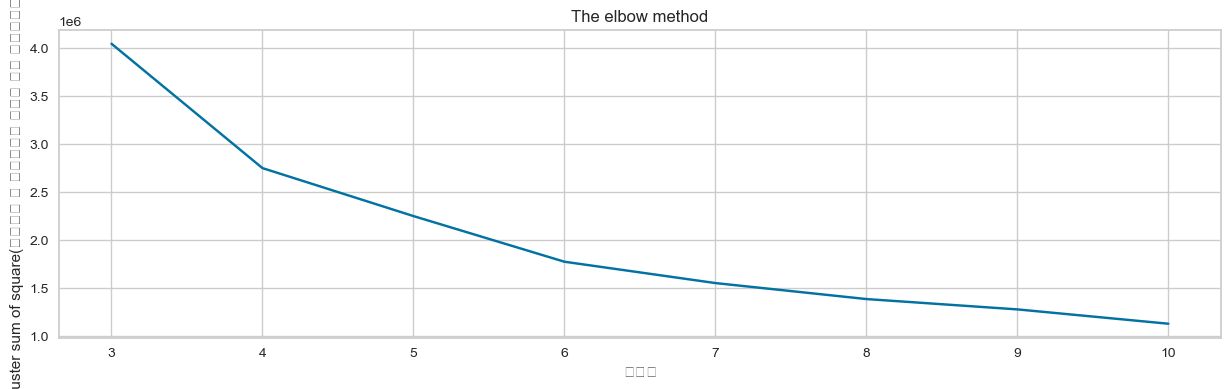

In [73]:
plt.figure(figsize=(15,4))
plt.plot(range(3,11), inertia_from3to4_1M)
plt.title('The elbow method')
plt.xlabel('군집수')
plt.ylabel('within cluster sum of square(클러스터 내 데이터들이 얼마나 서로 가까운지를 측정한 지표)');# 내부거리합을 최소화하는 방향으로 중심이동
plt.xticks(range(3,11))
plt.show();

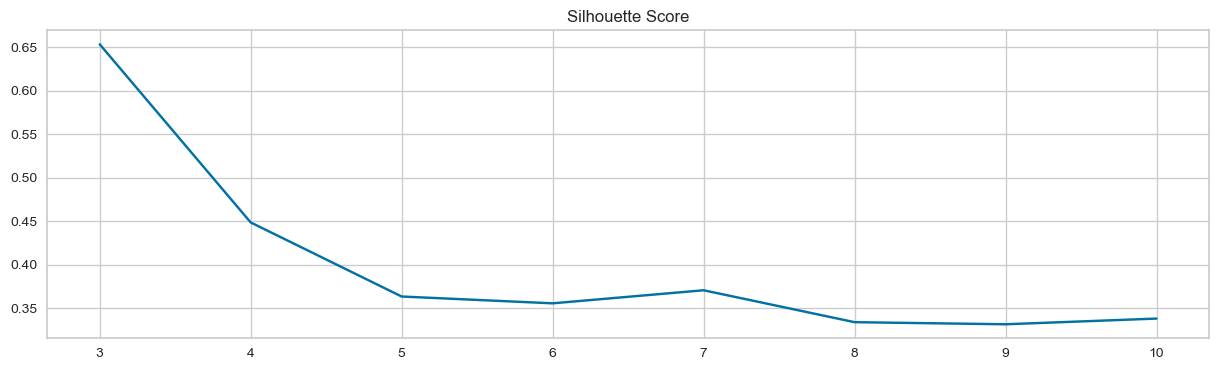

In [81]:
#실루엣 스코어 (데이터 포인트의 실루엣 계수는 해당 데이터 포인트가 얼마나 잘 클러스터링 되었는지를 나타냄.)
plt.figure(figsize=(15, 4))
plt.title('Silhouette Score')
plt.plot(list(range(3,11)), silhouetts_from3to4_1M)
plt.show()
#실루엣 스코어가 1에 가까울수록 좋음.
#군집이 7일 때 소폭 반등. 군집 7이 가장 좋아보임. 

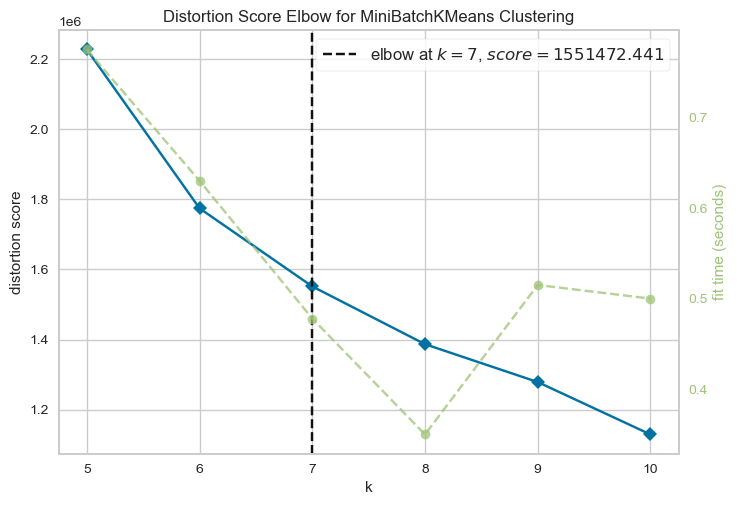

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
#실루엣 시각화 도우미
#클러스터별 각 샘플에 대한 실루엣 계수 표시 
from yellowbrick.cluster import KElbowVisualizer
KEV = KElbowVisualizer(mini_kmeans, k=range(5,11), n_init = 'auto') #k 범위를 어떻게 정하는지에 따라 k값의 결과는 달라진다.
KElbowVisualizer(mini_kmeans, k=range(5,11), n_init = 'auto')#5~range(,) 7이 나옴
KEV.fit(X)
KEV.show()
#distribusion score는? sum of square값

#기존에 군집이 5개로 나뉘어져 있지만 현재 kmeans를 통해서 7개로 나뉨. 

In [ ]:
#하단 코드부터는 확인해보기 위한 부분

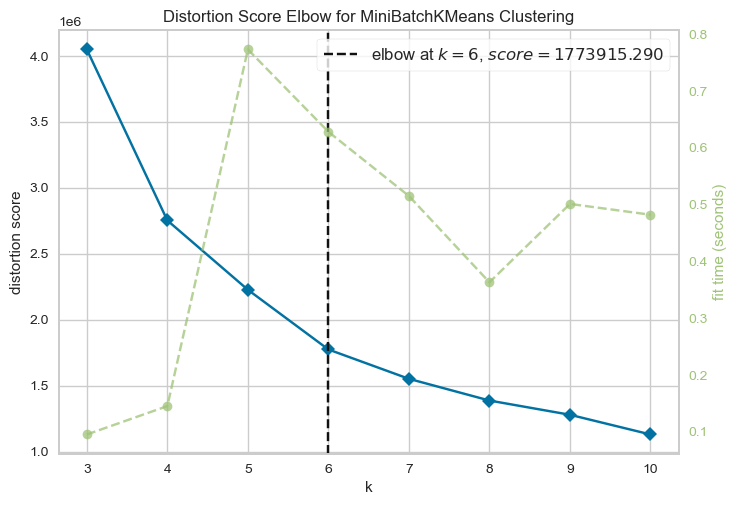

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
#실루엣 시각화 도우미
#클러스터별 각 샘플에 대한 실루엣 계수 표시 
# from yellowbrick.cluster import KElbowVisualizer
# KEV = KElbowVisualizer(mini_kmeans, k=range(3,11), n_init = 'auto') #k 범위를 어떻게 정하는지에 따라 k값의 결과는 달라진다.
# KElbowVisualizer(mini_kmeans, k=range(3,11), n_init = 'auto')#5~range(,) 6이 나옴
# KEV.fit(X)
# KEV.show()
#distribusion score는? sum of square값

#기존에 군집이 5개로 나뉘어져 있지만 현재 kmeans를 통해서 6개로 나뉨. 
#하지만 기존것은 5~10군집으로 학습한 모델인데 k를 3부터해서 잘못된 데이터 

In [87]:
from kneed import KneeLocator

kneedle = KneeLocator(range(3,11),silhouetts_from3to4_1M, curve='convex', direction='decreasing')
print(f"Elbow 위치: k = {kneedle.elbow}")

Elbow 위치: k = 5


In [100]:
inertia_from3to4_1M

[4048453.874071924,
 2752153.2156538465,
 2252234.6551793227,
 1776364.813061305,
 1553920.2238037128,
 1387270.9938385787,
 1279532.715393946,
 1130179.4943754217]

In [105]:
#전체데이터로 군집화를 진행하지 않고 일부 샘플링으로 진행해봤을 때 큰 차이가 없음을 확인 
pd.DataFrame({'10%':silhouetts_0_1M, '20%':silhouetts_0_2M,'40%': silhouetts_0_4M, '50%':silhouetts_1M})

,10%,20%,40%,50%
0,0.363610,0.362890,0.362776,0.363289
1,0.356518,0.355584,0.355399,0.355456
2,0.371224,0.370653,0.370646,0.370472
3,0.334034,0.334164,0.333857,0.333786
4,0.331771,0.331971,0.331569,0.331368
5,0.338039,0.338367,0.338073,0.337927


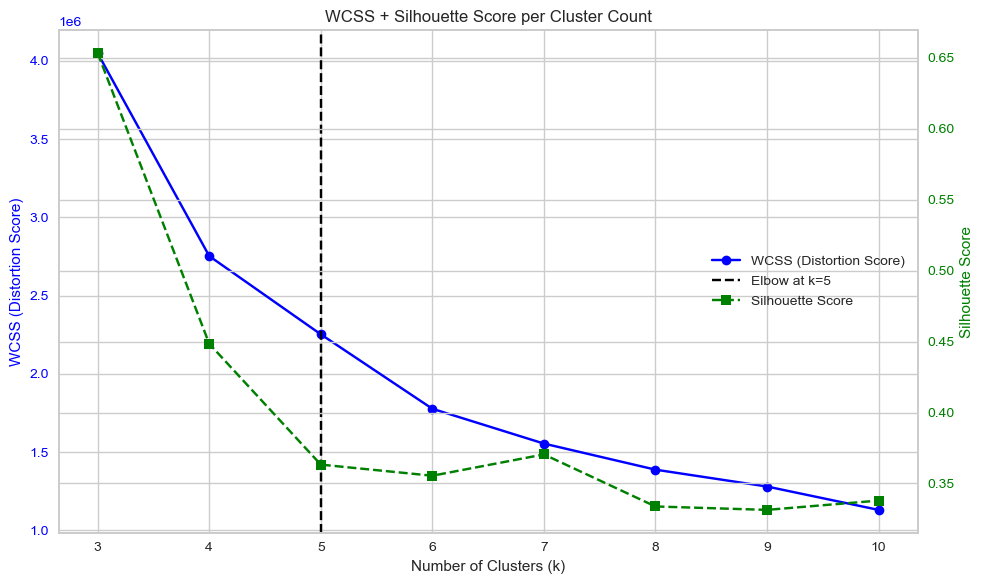

In [90]:
# 시각화  #1백만개의 데이터 기준
fig, ax1 = plt.subplots(figsize=(10, 6))

k_range=range(3,11)

# 엘보우 포인트 수동 탐지 (2차차분 방식으로 가장 급격한 변화 찾기)
diff = np.diff(inertia_from3to4_1M)
diff2 = np.diff(diff)
elbow_index = np.argmax(diff2) + 2  # +2 because diff2 starts from k=5
elbow_k = k_range[elbow_index]

# WCSS
ax1.plot(k_range, inertia_from3to4_1M, 'o-', color='blue', label='WCSS (Distortion Score)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS (Distortion Score)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.axvline(x=elbow_k, color='black', linestyle='--', label=f'Elbow at k={elbow_k}')

# Silhouette Score (보조 y축)
ax2 = ax1.twinx()
ax2.plot(k_range, silhouetts_from3to4_1M, 's--', color='green', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 범례
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center right')

plt.title('WCSS + Silhouette Score per Cluster Count')
plt.grid(True)
plt.tight_layout()
plt.show()
#elbow가 완만해지는 군집이 6에서 7로 바뀔때이고 실루엣스코어가 7에서 올라감.
#k=5 → 6부터는 감소폭이 작아지기 시작하기 때문에, 수학적으로는 k=5가 Elbow로 탐지된 것으로 보임. 
# Elbow = 첫 번째 큰 꺾이는 지점이지, 가장 완만해지는 구간의 중심점은 아님.
#자동 elbow로는 군집5가 선택되지만 종합적으로 고려해봤을 때 군집7 선택 

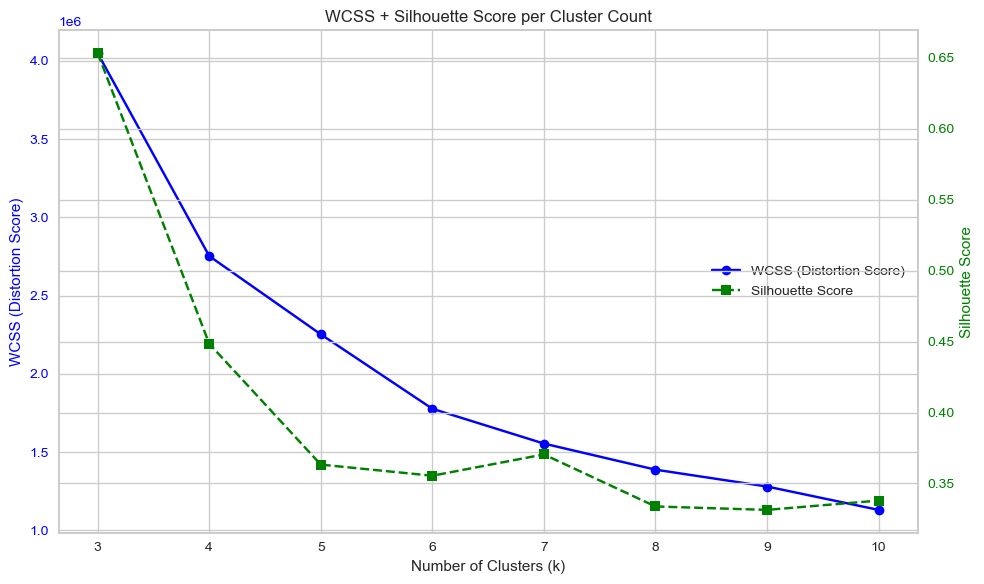

In [94]:
# 시각화 (Elbow 표시 없이) #1백만개의 데이터 기준
fig, ax1 = plt.subplots(figsize=(10, 6))

k_range=range(3,11)

# 엘보우 포인트 수동 탐지 (2차차분 방식으로 가장 급격한 변화 찾기)
# diff = np.diff(inertia_from3to4_1M)
# diff2 = np.diff(diff)
# elbow_index = np.argmax(diff2) + 2  # +2 because diff2 starts from k=5
# elbow_k = k_range[elbow_index]

# WCSS
ax1.plot(k_range, inertia_from3to4_1M, 'o-', color='blue', label='WCSS (Distortion Score)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS (Distortion Score)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
#ax1.axvline(x=elbow_k, color='black', linestyle='--', label=f'Elbow at k={elbow_k}')

# Silhouette Score (보조 y축)
ax2 = ax1.twinx()
ax2.plot(k_range, silhouetts_from3to4_1M, 's--', color='green', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 범례
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center right')

plt.title('WCSS + Silhouette Score per Cluster Count')
plt.grid(True)
plt.tight_layout()
plt.show()
#elbow가 완만해지는 군집이 6에서 7로 바뀔때이고 실루엣스코어가 7에서 올라감.
#k=5 → 6부터는 감소폭이 작아지기 시작하기 때문에, 수학적으로는 k=5가 Elbow로 탐지된 것으로 보임. 
# Elbow = 첫 번째 큰 꺾이는 지점이지, 가장 완만해지는 구간의 중심점은 아님.
#자동 elbow로는 군집5가 선택되지만 종합적으로 고려해봤을 때 군집7 선택 

In [ ]:
#위 코드까지는 확인해보기 위한 부분

In [10]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# n_clusters 범위
range_n_clusters = range(3, 11)  

inertia = []
silhouettes = []

# tqdm 진행바 적용
for n_cluster in tqdm(range_n_clusters, desc="MiniBatchKMeans 진행 중"):
    mini_kmeans = MiniBatchKMeans(
        n_clusters=n_cluster,
        n_init='auto',              # Scikit-learn 1.4 이상이면 'auto' 가능
        random_state=0,
        batch_size=10000,
        max_iter=20
    )
    
    mini_kmeans.fit(X)  
    inertia.append(mini_kmeans.inertia_)
    print(f'{n_cluster}군집 실루엣 스코어 계산 들어감.')
    # silhouette score 계산 (단점: 대규모 데이터에서 속도 느림)
    silhouettes.append(silhouette_score(X, mini_kmeans.labels_, sample_size=100000, random_state=0)) #샘플수를 100만개로 줄여서 실루엣 스코어 계산

inertia_0_1M= inertia.copy()
silhouetts_0_1M= silhouettes.copy()
inertia_0_1M, silhouetts_0_1M


MiniBatchKMeans 진행 중:   0%|                                                                   | 0/8 [00:00<?, ?it/s]

3군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  12%|███████▎                                                  | 1/8 [02:10<15:15, 130.84s/it]

4군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  25%|██████████████▌                                           | 2/8 [04:14<12:39, 126.59s/it]

5군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  38%|█████████████████████▊                                    | 3/8 [06:16<10:21, 124.37s/it]

6군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  50%|█████████████████████████████                             | 4/8 [08:22<08:21, 125.26s/it]

7군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  62%|████████████████████████████████████▎                     | 5/8 [10:24<06:11, 123.97s/it]

8군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  75%|███████████████████████████████████████████▌              | 6/8 [12:23<04:04, 122.23s/it]

9군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중:  88%|██████████████████████████████████████████████████▊       | 7/8 [14:21<02:00, 120.93s/it]

10군집 실루엣 스코어 계산 들어감.


MiniBatchKMeans 진행 중: 100%|██████████████████████████████████████████████████████████| 8/8 [16:21<00:00, 122.65s/it]


([4048453.874071924,
  2752153.2156538465,
  2252234.6551793227,
  1776364.813061305,
  1553920.2238037128,
  1387270.9938385787,
  1279532.715393946,
  1130179.4943754217],
 [0.6529131524366837,
  0.4493225131917856,
  0.36361022421379835,
  0.35651752558753647,
  0.371223897411262,
  0.33403420981922827,
  0.33177105227823406,
  0.33803942891067223])

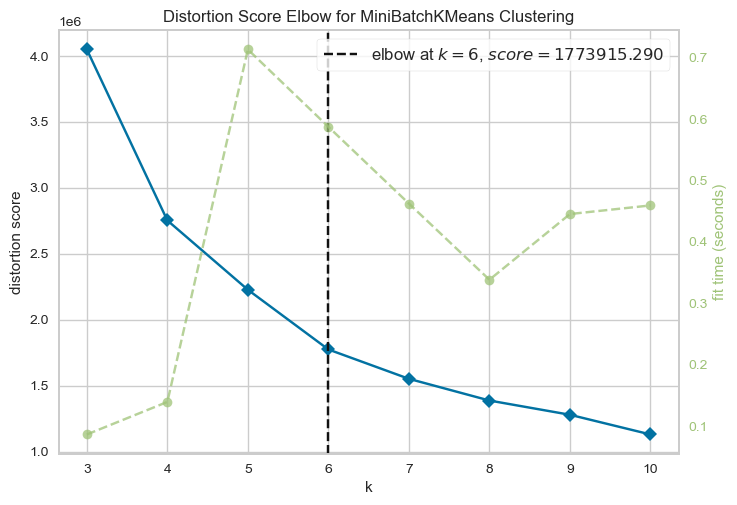

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
KEV = KElbowVisualizer(mini_kmeans, k=range(3,11), n_init = 'auto') #k 범위를 어떻게 정하는지에 따라 k값의 결과는 달라진다.
KElbowVisualizer(mini_kmeans, k=range(3,11), n_init = 'auto')#3~range(,) 6이 나옴
KEV.fit(X)
KEV.show()

In [ ]:
######
# silhouette_score 구하기 과정에서
#silhouette_avg = silhouette_score(X, kmeans.labels_)
#그래프를 그리기 전 silhouette_avg를 산출하는데 너무 오랜 시간이 걸려서 10만개로 샘플링 

In [85]:
#시간이 너무 걸려서 10만개 샘플링 
import matplotlib.pyplot as plt
import seaborn as sns

# 새로 샘플링한 데이터프레임 생성
from scipy.stats import norm

#평균(중심값//기대값), 표준편차
mu_dur = rfm['Duration'].mean()
sigma_dur = rfm['Duration'].std()
mu_freq = rfm['Frequency'].mean()
sigma_freq = rfm['Frequency'].std()
mu_mon = rfm['MonetaryValue'].mean()
sigma_mon = rfm['MonetaryValue'].std()

sample_size = 150000
#-값 제외
#평균과 표준편차가 모집단을 따르는 샘플df 생성 norm.rvs로 정규분포에서 무작위 표본 생성 
# sample_df = pd.DataFrame({
#     'Duration': np.round(norm.rvs(loc=mu_dur, scale=sigma_dur, size=sample_size)).astype(int),
#     'Frequency': np.round(norm.rvs(loc=mu_freq, scale=sigma_freq, size=sample_size)).astype(int),
#     'MonetaryValue': np.round(norm.rvs(loc=mu_mon, scale=sigma_mon, size=sample_size)).astype(int)
# })
# sample_df.describe()

#10만개만 샘플링하려 했지만 -인 값을 제외해서 
sample_df = rfm[(rfm['Duration'] > 0) & (rfm['Frequency'] > 0) & (rfm['MonetaryValue'] > 0)].sample(n=100000, random_state=0)
sample_df.describe()

,Frequency,MonetaryValue,Duration
count,100000.000000,1.000000e+05,100000.000000
mean,236.477440,6.991992e+06,10.511510
std,237.007353,8.089265e+06,2.712619
min,1.000000,1.230000e+02,1.000000
25%,59.000000,2.019494e+06,10.000000
50%,148.000000,4.639408e+06,12.000000
75%,340.000000,8.643299e+06,12.000000
max,1030.000000,8.882724e+07,12.000000


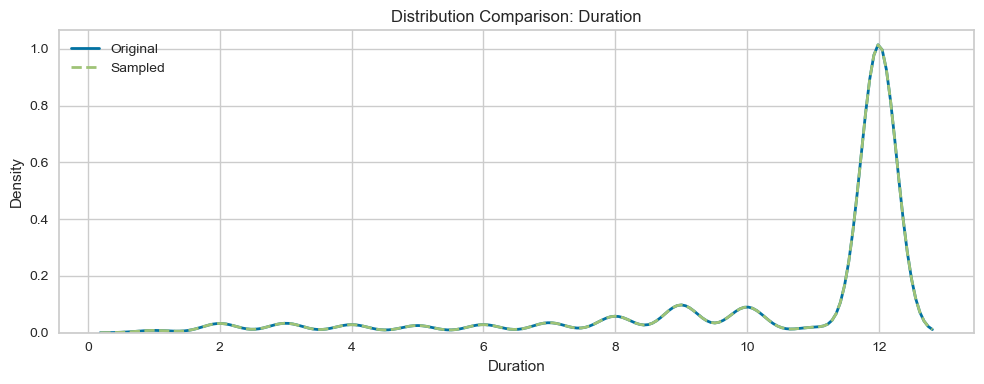

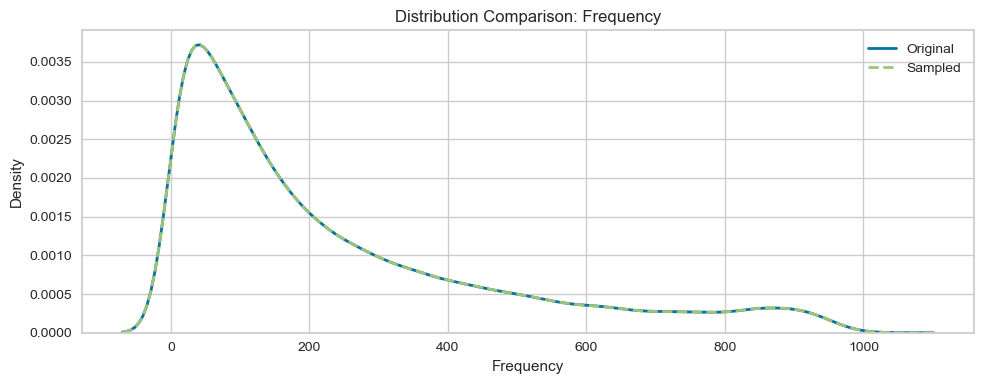

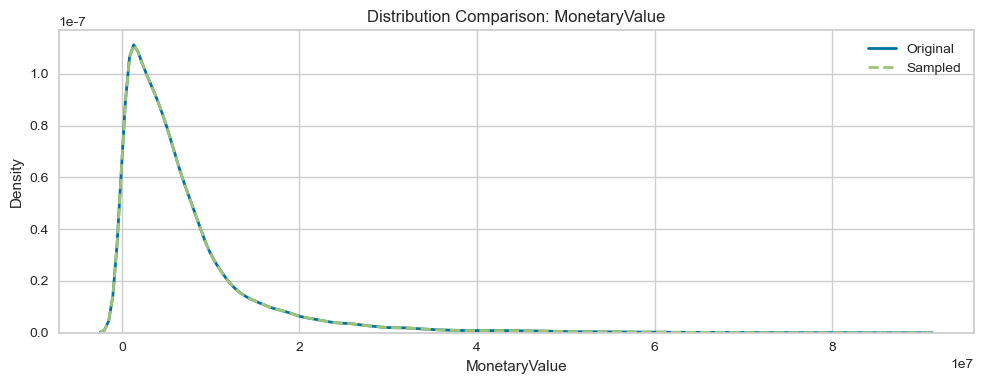

In [86]:
# 분포 시각화 비교
features = ['Duration', 'Frequency', 'MonetaryValue']
for col in features:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(sample_df[col], label='Original', linewidth=2)
    sns.kdeplot(sample_df[col], label='Sampled', linestyle='--', linewidth=2)
    plt.title(f'Distribution Comparison: {col}')
    plt.legend()
    plt.tight_layout()
    plt.show()
#데이터들이 매우 치우쳐 있어서 변수변환 필요 

In [87]:
#https://wikidocs.net/228781
#표본집단 (10만개)가 모집단 (226만개) 데이터의 분포를 따르는지 검정 
# 정량적 검정: Kolmogorov–Smirnov test
from scipy.stats import ks_2samp

ks_results = {}
for col in features:
    stat, p_value = ks_2samp(rfm[col], sample_df[col])
    ks_results[col] = {'KS Statistic': stat, 'p-value': p_value}
    if p_value > 0.05:
        print(f"{col}는 귀무가설을 기각하지 않음. 두 분포가 통계적으로 유의미하게 다르다고 보기 어렵다.")
    else:
        print(f"{col}는 귀무가설을 기각함. 데이터는 통계적으로 유의미하게 비슷하다고 봄.")

# 결과 출력
ks_results_df = pd.DataFrame(ks_results).T
ks_results_df        
#현재 10만건의 샘플링 데이터는 모집단과 비슷한 분포를 가짐.

Duration는 귀무가설을 기각하지 않음. 두 분포가 통계적으로 유의미하게 다르다고 보기 어렵다.
Frequency는 귀무가설을 기각하지 않음. 두 분포가 통계적으로 유의미하게 다르다고 보기 어렵다.
MonetaryValue는 귀무가설을 기각하지 않음. 두 분포가 통계적으로 유의미하게 다르다고 보기 어렵다.


,KS Statistic,p-value
Duration,0.001886,0.884754
Frequency,0.002959,0.371187
MonetaryValue,0.002196,0.744418


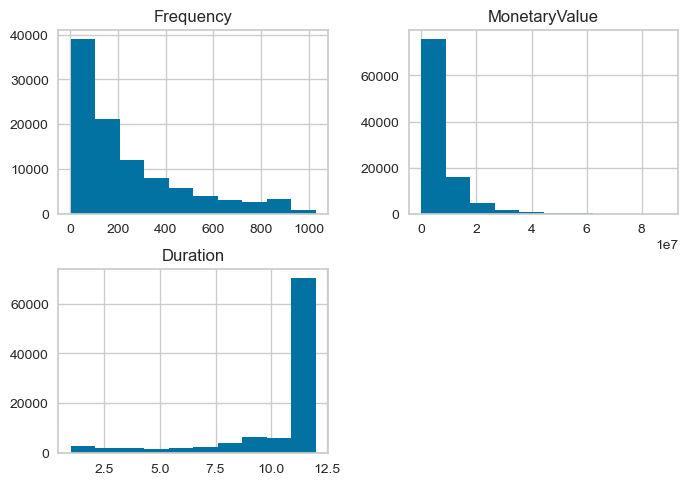

In [88]:
sample_df.hist();
#Frequency와 MonetaryValue가 한쪽으로 치우친 경향이 있어 변수변환 수행 

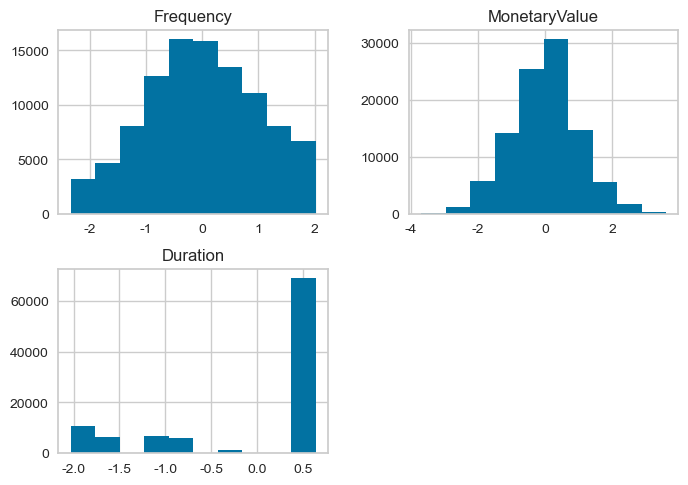

In [95]:
#https://www.kaggle.com/code/swagabyss/skew-handling-techniques
#https://seeyapangpang.tistory.com/34
#왼쪽으로 치우쳤을 때(positive skewness) 로그변환, 제곱근(루트)변환 ,역수변환, box-cox변환, yeo-johnson변환 사용 
#오른쪽으로 치우쳤을 때(negative skewness) log(max(x)+1 -x) 혹은 제곱변환, 지수변환, box-cox, yeo johnson변환 사용 
#여존슨 변환은 박스콕스 변환의 확장판으로 어느쪽으로 치우쳐도 사용가능 

#powerTransformer를 사용하면 yeo johnson(기본)과 box cox 변환 사용가능 
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
sample_df_trans = pt.fit_transform(sample_df)

sample_df_power = pd.DataFrame(sample_df_trans, columns=sample_df.columns)
sample_df_power.hist();
#사용기간은 대체적으로 11개월, 12개월에 몰렸기 때문에 이런 결과가 나온 것으로 보임. 

In [98]:
#정규분포를 따르는지 확인하고 싶다면 
from scipy.stats import kstest

for col in sample_df_power.columns:
    #asymp(asymptotic approximation)는 p-value 계산 방법으로 근사 계산 방식을 의미 
    ks_statistic, ks_p_value = kstest(sample_df_power[col], 'norm', args=(np.mean(sample_df_power[col]), np.std(sample_df_power[col])),mode='asymp')
    #statistic은 데이터 분포와 이론분포간 최대차이(D값) // ks 통계량
    #p value는 이 데이터가 정규분포를 따른다는 귀무가설에 대한 유의확률
    print(ks_statistic, ks_p_value)
    if p_value > 0.05:
        print(f"{col}는 귀무가설을 기각하지 않음. 샘플링한 데이터가 정규분포를 따름")
    else:
        print(f"{col}는 귀무가설을 기각함. 샘플링한 분포가 정규분포를 따르지 않는다고 봄.")

#ks 검정은 누적분포함수(CDF)의 최대차이(D값) 측정
#중앙값 근처에 민감하고 꼬리부분은 덜 민감 
#비교 대상의 모수(평균, 표준편차)를 알고 있어야 하며 분포 가정없이 다양한 분포 비교 가능. 하지만 양끝단 감지에 약함.

#여존슨 변환을 거치고 난 후 정규분포 형태로 된 것을 확인 

0.025874699814676494 1.3582269854141115e-58
Frequency는 귀무가설을 기각하지 않음. 샘플링한 데이터가 정규분포를 따름
0.021160762788676735 2.4981884359735774e-39
MonetaryValue는 귀무가설을 기각하지 않음. 샘플링한 데이터가 정규분포를 따름
0.4295309992916974 0.0
Duration는 귀무가설을 기각하지 않음. 샘플링한 데이터가 정규분포를 따름


In [99]:
from scipy.stats import normaltest
for col in sample_df_power.columns:
    stat, p = normaltest(sample_df_power[col])
    print(f"D'Agostino Test: statistic={stat:.4f}, p-value={p:.4f}")
    print(col)
    if p > 0.05:
        print("정규분포일 가능성이 높음.")
    else:
        print("정규분포가 아닐 가능성이 큼.")
        
#데이터가 정규분포를 따르는지 검정
#왜도와 첨도의 통계량을 사용
#샘플의 왜도,첨도와 정규분포의 기대값을 비교 
#분포의 비대칭성, 첨도에 민감하며 작은 샘플에서 부정확할 수도 있음.

D'Agostino Test: statistic=4615.8181, p-value=0.0000
Frequency
정규분포가 아닐 가능성이 큼.
D'Agostino Test: statistic=112.4960, p-value=0.0000
MonetaryValue
정규분포가 아닐 가능성이 큼.
D'Agostino Test: statistic=16926.5166, p-value=0.0000
Duration
정규분포가 아닐 가능성이 큼.


In [108]:
#기존에 고객등급은 11개 등급으로 나뉘는데 현재 데이터 기준으로는 5개로 나뉨. 
#RFM기법에서 5개로 할당했기 때문에 현재도 5개 기준으로 해본다.
kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=0)
kmeans5.fit(sample_df_power)

KMeans(n_clusters=5, random_state=42)

In [109]:
#2021 RFM 모형의 가중치 선택에 관한 연구
# K개로 분류된 각 그룹별로 R, F, M의 표준편차를 평균으로 나누어 CV를 산출한다.
# CV를 최소로하는 CVrn, CVfn, CVmn을 찾아 전체 CV의 합으로 다시 나누어 w1, w2, w3를 구한다.
# 모든 가중치의 합을 1로 만들기 위해 w1, w2, w3 각각을 3개를 모두 더한 값으로 나누어 W1, W2, W3를 구하여 최종 가중치로 결정하였다.
pd.Series(kmeans5.labels_).value_counts()

4    33443
0    20005
2    17246
1    16370
3    12936
Name: count, dtype: int64

In [111]:
# silhouette_score 구하기
silhouette_avg5 = silhouette_score(sample_df_power, kmeans5.labels_) 
#mini_kmeans.labels_는 kmeans 알고리즘으로 분류된 결과
silhouette_avg5

0.3782729221630423

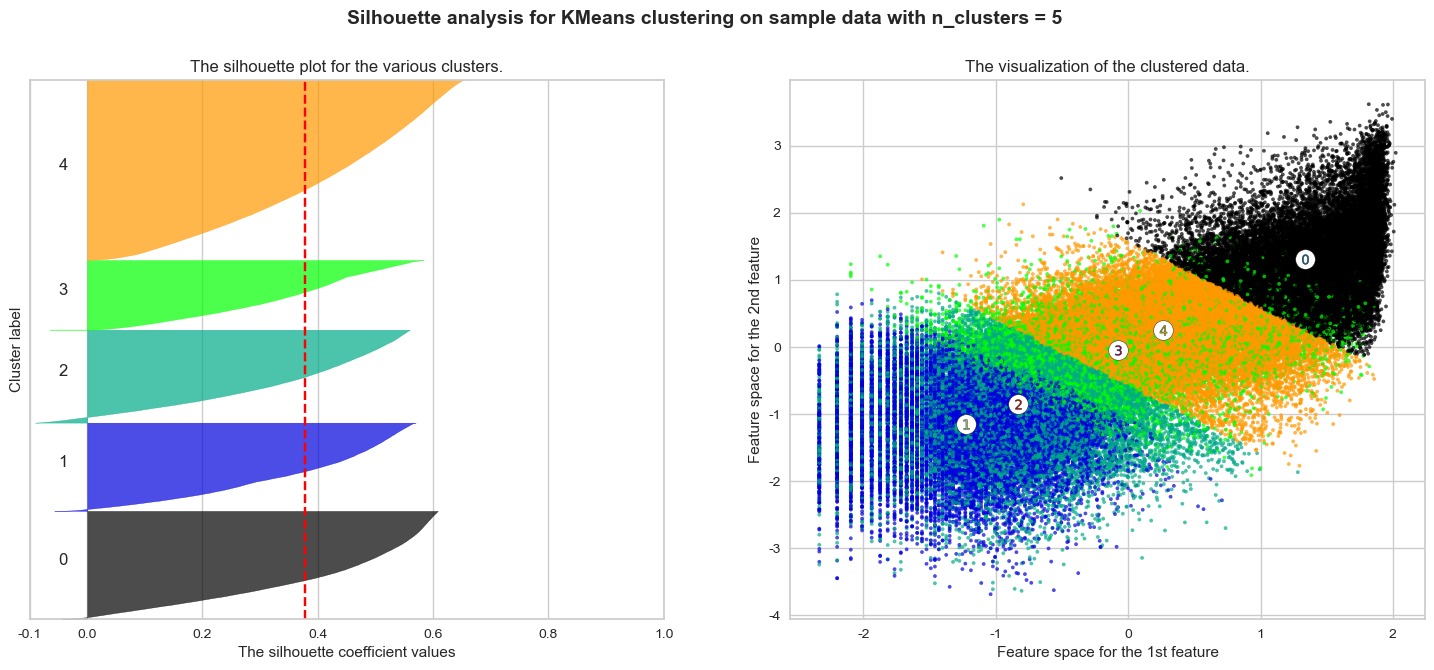

In [127]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
n_clusters=5
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(sample_df_power) + (n_clusters + 1) * 10])

cluster_labels5 = kmeans5.labels_
sample_silhouette_values5 = silhouette_samples(sample_df_power, cluster_labels5)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values5 = sample_silhouette_values5[cluster_labels5 == i]

    ith_cluster_silhouette_values5.sort()

    size_cluster_i5 = ith_cluster_silhouette_values5.shape[0]
    y_upper = y_lower + size_cluster_i5

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values5,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i5, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg5, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors5 = cm.nipy_spectral(cluster_labels5.astype(float) / n_clusters)
ax2.scatter(
    sample_df_power.iloc[:, 0], sample_df_power.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors5, edgecolor="k"
)

# Labeling the clusters
centers5 = kmeans5.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers5[:, 0],
    centers5[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers5):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()
#다시 해석
#군집2와 군집3이 불분명하게 나뉘는 경향이 존재. 
#1,2,3 군집에 0밑으로 삐져나온 그래프가 있는 것으로 보아 약간 잘못 군집된 데이터들이 존재하긴 하나
#4군집을 제외하고 전반적으로 군집마다 비슷한 실루엣 스코어를 보인다. = 전반적으로 잘 나뉘어졌다.

#크게 4개의 군집으로 보임. 

In [125]:
centers5 = kmeans5.cluster_centers_
centers5
#len(colors5)

array([[ 1.3325779 ,  1.31568654,  0.60295927],
       [-1.22502806, -1.15134924, -1.68173637],
       [-0.82979047, -0.85931212,  0.61478441],
       [-0.07397519, -0.04759846, -1.24534184],
       [ 0.26473594,  0.24378168,  0.62782241]])

In [115]:
#군집 6개
kmeans6 = KMeans(n_clusters=6, n_init='auto', random_state=0)
kmeans6.fit(sample_df_power)

silhouette_avg6 = silhouette_score(sample_df_power, kmeans6.labels_) #9시 29분 시작 
silhouette_avg6

0.34961309814957625

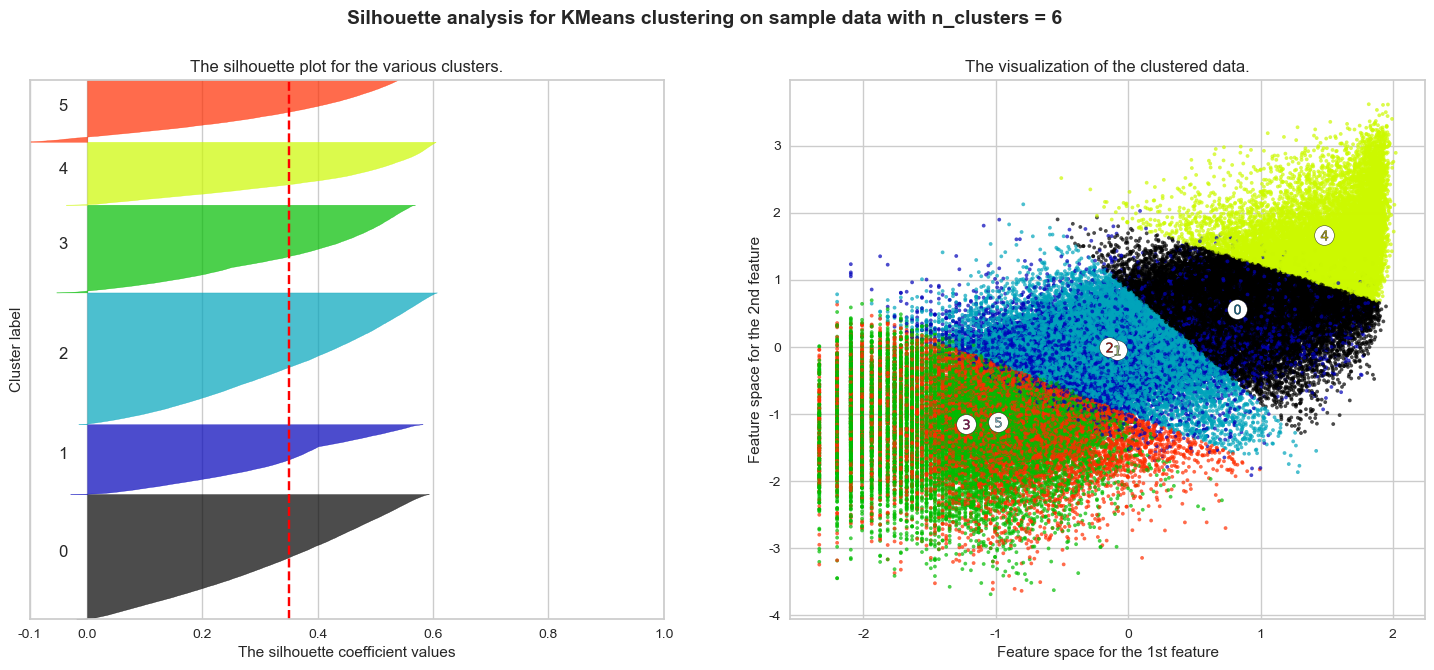

In [128]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
n_clusters=6
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(sample_df_power) + (n_clusters + 1) * 10])

cluster_labels6 = kmeans6.labels_
sample_silhouette_values6 = silhouette_samples(sample_df_power, cluster_labels6)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values6 = sample_silhouette_values6[cluster_labels6 == i]

    ith_cluster_silhouette_values6.sort()

    size_cluster_i6 = ith_cluster_silhouette_values6.shape[0]
    y_upper = y_lower + size_cluster_i6

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values6,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i6, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg6, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors6 = cm.nipy_spectral(cluster_labels6.astype(float) / n_clusters)
ax2.scatter(
    sample_df_power.iloc[:, 0], sample_df_power.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors6, edgecolor="k"
)

# Labeling the clusters
centers6 = kmeans6.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers6[:, 0],
    centers6[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers6):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()
#균잡3과5, 군집2와1이 비슷하게 겹치는 경향 존재 이 두 군집은 어떤 경향이 있는지 확인해볼 필요가 있어보임.
#군집5에서 상당부분 잘못 분류가 된 데이터들이 존재. 다른 군집에서도 0을 제외하고 잘못 분류한 데이터들이 존재. 
#1군집은 2번군집과 0번군집에 걸쳐 고르게 분포
#크게 4개의 군집으로 보임. 

In [116]:
#군집 7개
kmeans7 = KMeans(n_clusters=7, n_init='auto', random_state=0)
kmeans7.fit(sample_df_power)

silhouette_avg7 = silhouette_score(sample_df_power, kmeans7.labels_) #9시 29분 시작 
silhouette_avg7

0.3208418847842029

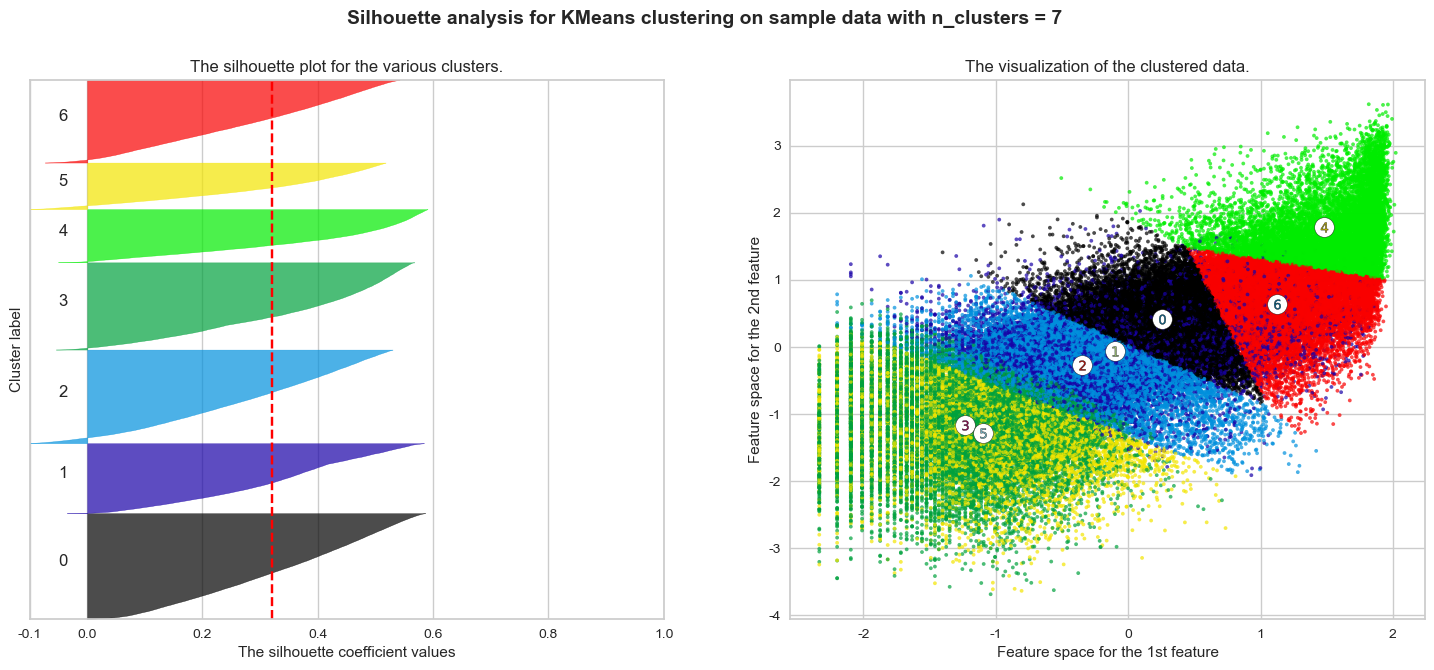

In [129]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
n_clusters=7
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(sample_df_power) + (n_clusters + 1) * 10])

cluster_labels7 = kmeans7.labels_
sample_silhouette_values7 = silhouette_samples(sample_df_power, cluster_labels7)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values7 = sample_silhouette_values7[cluster_labels7 == i]

    ith_cluster_silhouette_values7.sort()

    size_cluster_i7 = ith_cluster_silhouette_values7.shape[0]
    y_upper = y_lower + size_cluster_i7

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values7,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i7, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg7, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors7 = cm.nipy_spectral(cluster_labels7.astype(float) / n_clusters)
ax2.scatter(
    sample_df_power.iloc[:, 0], sample_df_power.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors7, edgecolor="k"
)

# Labeling the clusters
centers7 = kmeans7.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers7[:, 0],
    centers7[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers7):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()
#앞서 분석했던 군집수 5,6에 비해 잘못 군집된 데이터들이 더 많이 존재하는것을 확인.
#크게 5개 군집으로 보임 

In [ ]:
#기존에 고객들의 등급이 5개인 것을 감안하면 7군집으로 나뉜 케이스를 보는것이 더 적합해 보이지만
#실루엣계수와 나눠진 결과를 그래프로 봤을 때 군집5가 가장 적합해 보임. 

In [ ]:
#전체흐름
# 1.그냥 랜덤샘플링 
# 모든 데이터로 모든 군집 학습을 kmeans를 하려했지만 시간이 너무 오래걸림. 일주일 이상 걸릴 것으로 예상됨
#기존에 군집 5,6,마치고 7학습도중 까지 3일 걸림.

# 10만 20만 40만 100만 > minibatchkmeans로 성능비교
# 샘플링한 데이터 10만개에서 100만개의 minibatch kmens 결과를 비교해봤을 때 샘플링 수가 달라져도 실루엣 계수는 크게 달라지지 않음을 확인.
# 10만에서 100만 기준 학습시 모든 경우에서 군집7이 가장 실루엣 계수가 좋은 것으로 나타남 
#이렇게 했을 때 소요 이틀

#모집단과 비슷하게 해봤을 때 샘플링
# 그래서 기존 집단수인 5에서 7개로 좁혀 kmeans 학습 
# 10만개를 기준으로 모집단과 비슷한 표본집단 10만개로 학습해봤을 때 군집 5~7중 5군집이 가장 클러스터링하는데 적합해보임. 

#그래서 전체 데이터를 기준으로 5군집 kmeans 수행 진행 


In [ ]:
#전체 데이터 기준으로 

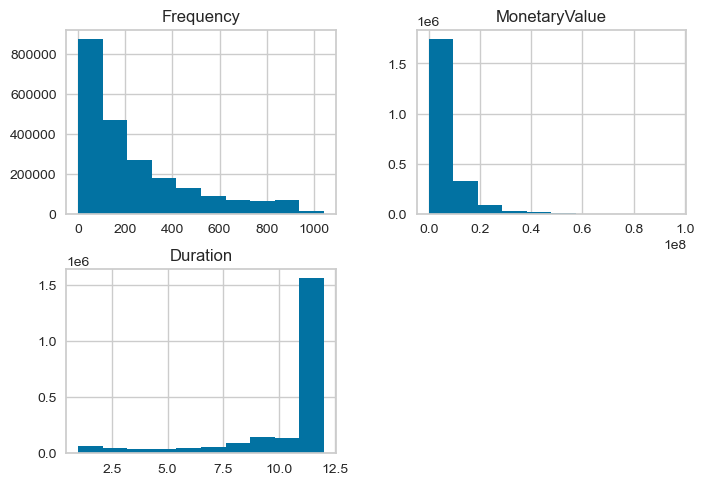

In [29]:
rfm.hist();

In [16]:
rfm.describe()
#-값 없음

,Frequency,MonetaryValue,Duration
count,2.230797e+06,2.230797e+06,2.230797e+06
mean,2.376098e+02,7.008404e+06,1.050894e+01
std,2.375453e+02,8.060360e+06,2.708955e+00
min,1.000000e+00,1.000000e+02,1.000000e+00
25%,5.900000e+01,2.033140e+06,1.000000e+01
50%,1.490000e+02,4.661516e+06,1.200000e+01
75%,3.430000e+02,8.684494e+06,1.200000e+01
max,1.041000e+03,9.578380e+07,1.200000e+01


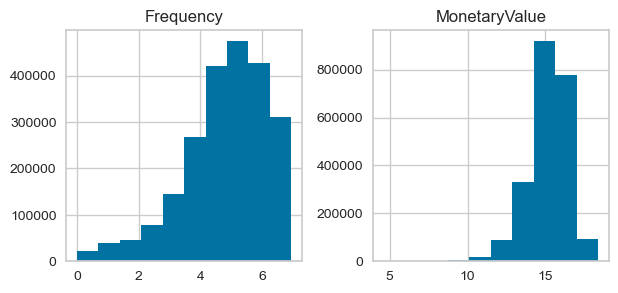

In [48]:
#원래 데이터가 왼쪽으로 치우쳤기 때문에 로그, 루트(제곱근), 여존슨 변환을 고려함. 
#변수변환
#rfm_log = np.log(rfm)
rfm_log.loc[:,['Frequency', 'MonetaryValue']].hist(figsize=(7, 3));
#치우침 

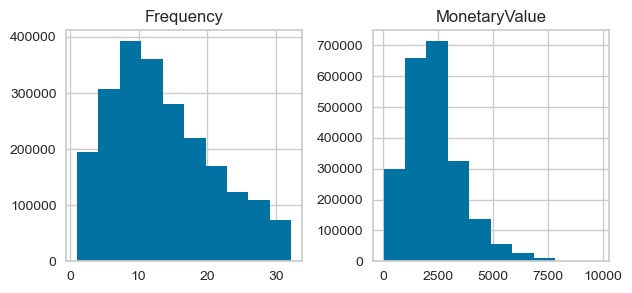

In [49]:
rfm_root=np.sqrt(rfm[['Frequency', 'MonetaryValue']])
rfm_root.loc[:,['Frequency', 'MonetaryValue']].hist(figsize=(7, 3));

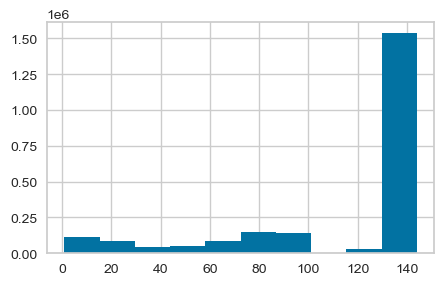

In [52]:
#원래 데이터가 오른쪽으로 치우쳐 스케일러보다는 제곱, 지수, 여존슨 변환을 사용함. 
rfm_squared=rfm['Duration']**2
rfm_squared.hist(figsize=(5, 3));

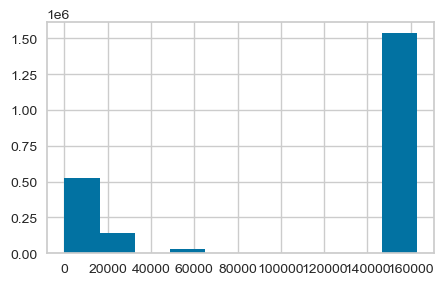

In [53]:
rfm_exp=np.exp(rfm['Duration'])
rfm_exp.hist(figsize=(5, 3));

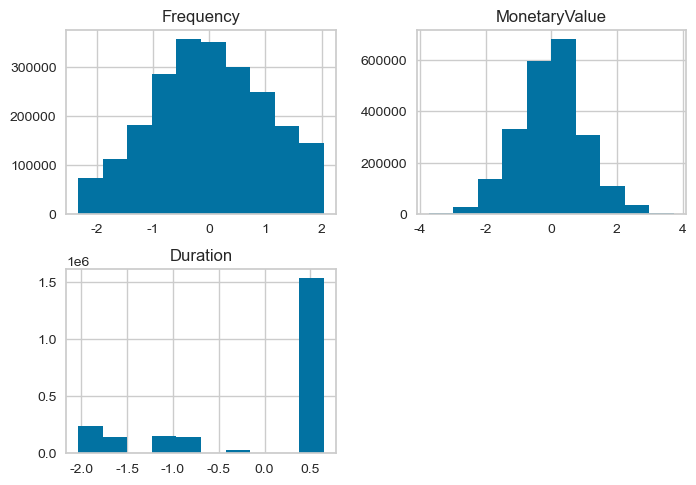

In [17]:
#여존슨 변환 
#powerTransformer를 사용하면 yeo johnson(기본)과 box cox 변환 사용가능 
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df_trans = pt.fit_transform(rfm)

df_power = pd.DataFrame(df_trans, columns=rfm.columns)
df_power.hist();
#여존슨 변환이 더 정규분포에 가깝게 변환됨을 확인. 

In [57]:
#정규분포를 따르는지 확인하고 싶다면 
from scipy.stats import kstest

for col in df_power.columns:
    #asymp(asymptotic approximation)는 p-value 계산 방법으로 근사 계산 방식을 의미 
    ks_statistic, ks_p_value = kstest(df_power[col], 'norm', args=(np.mean(df_power[col]), np.std(df_power[col])),mode='asymp')
    #statistic은 데이터 분포와 이론분포간 최대차이(D값) // ks 통계량
    #p value는 이 데이터가 정규분포를 따른다는 귀무가설에 대한 유의확률
    print(ks_statistic, ks_p_value)
    if ks_p_value > 0.05:
        print(f"{col}는 귀무가설을 기각하지 않음. 샘플링한 데이터가 정규분포를 따름")
    else:
        print(f"{col}는 귀무가설을 기각함. 샘플링한 분포가 정규분포를 따르지 않는다고 봄.")

#ks 검정은 누적분포함수(CDF)의 최대차이(D값) 측정
#중앙값 근처에 민감하고 꼬리부분은 덜 민감 
#비교 대상의 모수(평균, 표준편차)를 알고 있어야 하며 분포 가정없이 다양한 분포 비교 가능. 하지만 양끝단 감지에 약함.

#여존슨 변환을 거치고 난 후 정규분포 형태로 된 것을 확인 

0.025791787368692587 0.0
Frequency는 귀무가설을 기각함. 샘플링한 분포가 정규분포를 따르지 않는다고 봄.
0.02071058157515837 0.0
MonetaryValue는 귀무가설을 기각함. 샘플링한 분포가 정규분포를 따르지 않는다고 봄.
0.42841502443289314 0.0
Duration는 귀무가설을 기각함. 샘플링한 분포가 정규분포를 따르지 않는다고 봄.


In [58]:
from scipy.stats import normaltest
for now in df_power.columns:
    stat, p = normaltest(df_power[now])
    print(f"D'Agostino Test: statistic={stat:.4f}, p-value={p:.4f}")
    print(now)
    if p > 0.05:
        print("정규분포일 가능성이 높습니다.")
    else:
        print("정규분포가 아닐 가능성이 큽니다.")

D'Agostino Test: statistic=106518.5568, p-value=0.0000
Frequency
정규분포가 아닐 가능성이 큽니다.
D'Agostino Test: statistic=2024.7188, p-value=0.0000
MonetaryValue
정규분포가 아닐 가능성이 큽니다.
D'Agostino Test: statistic=379804.0450, p-value=0.0000
Duration
정규분포가 아닐 가능성이 큽니다.


In [ ]:
#정규분포에 해당하지는 않지만 현재로선 이 분포형태가 정규분포에 가까워 여존슨 변환한 데이터 사용 

,Frequency,MonetaryValue,Duration
count,2.230797e+06,2.230797e+06,2.230797e+06
mean,-7.717719e-16,9.086522e-16,2.424824e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.322711e+00,-3.723549e+00,-2.029831e+00
25%,-7.120064e-01,-6.373549e-01,-7.738570e-01
50%,-1.744129e-02,3.212683e-02,6.436566e-01
75%,7.505114e-01,6.162034e-01,6.436566e-01
max,2.031812e+00,3.738627e+00,6.436566e-01


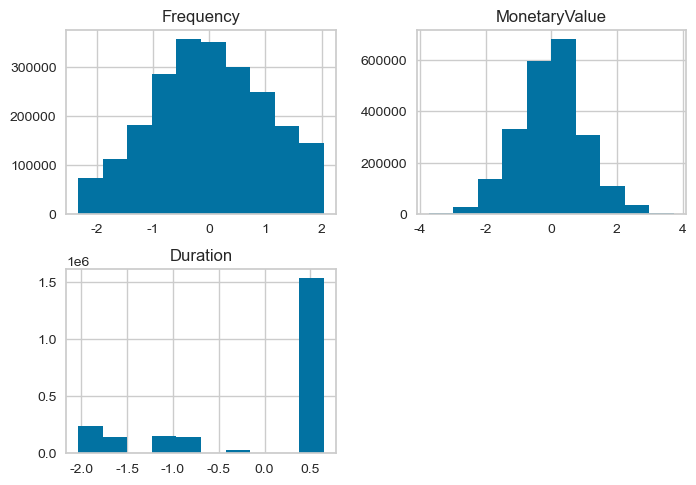

In [59]:
#rb스케일링
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()

X=pd.DataFrame(df_power, columns= df_power.columns)
display(X.describe())

#hist 확인
X.hist();

In [61]:
#엄청 오래걸림(셀 재실행전에 생각해볼 것)
##25일 낮 12시 시작 26일 오전9시 전에 끝남 24시간 정도 걸린듯

silhouette_avg5_final = silhouette_score(df_power, kmeans5_final.labels_) 
#mini_kmeans.labels_는 kmeans 알고리즘으로 분류된 결과
silhouette_avg5_final
#0.3787796763002451


0.3787796763002451

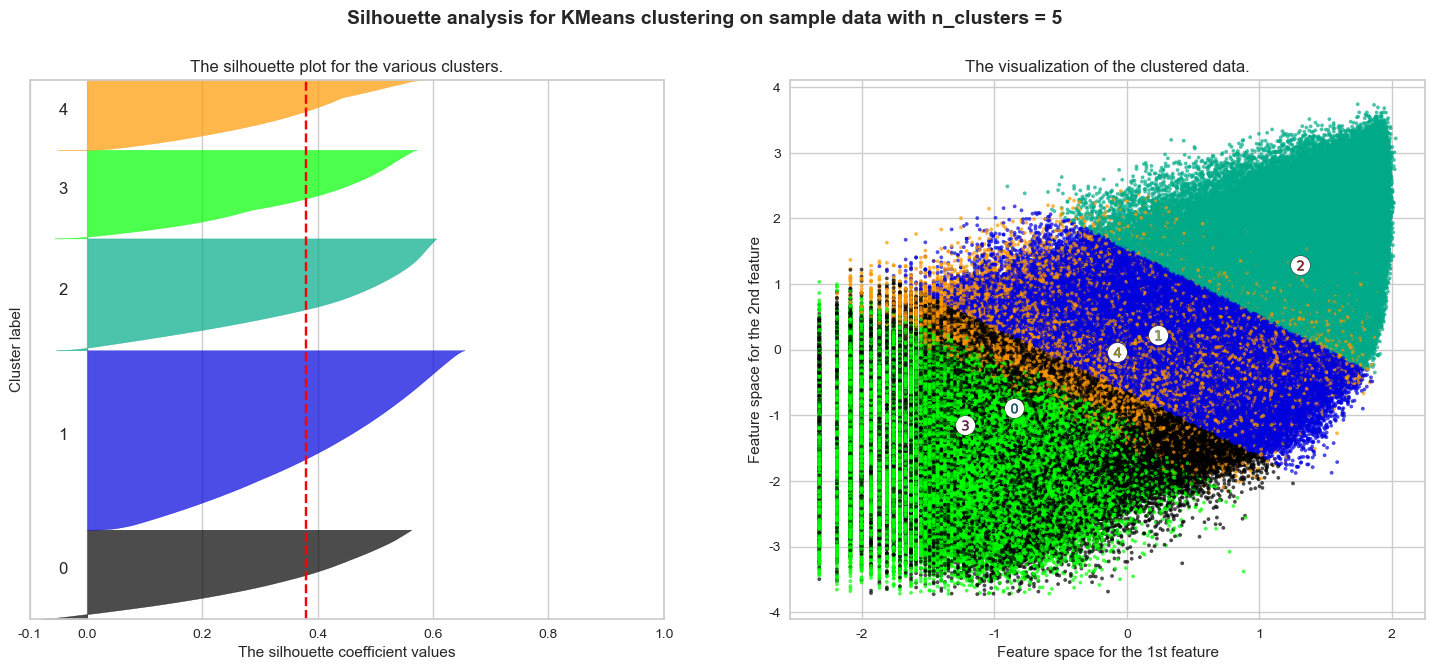

In [62]:
#엄청 오래걸림(셀 재실행전에 생각해볼 것)
#오던 9시이후부터 오후10시까지 돌아서 끝남 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
n_clusters=5
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df_power) + (n_clusters + 1) * 10])

cluster_labels5_final = kmeans5_final.labels_
silhouette_values5_final = silhouette_samples(df_power, cluster_labels5_final)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values5_final = silhouette_values5_final[cluster_labels5_final == i]

    ith_cluster_silhouette_values5_final.sort()

    size_cluster_i5_final = ith_cluster_silhouette_values5_final.shape[0]
    y_upper = y_lower + size_cluster_i5_final

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values5_final,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i5_final, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg5_final, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors5_final = cm.nipy_spectral(cluster_labels5_final.astype(float) / n_clusters)
ax2.scatter(
    df_power.iloc[:, 0], df_power.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors5_final, edgecolor="k"
)

# Labeling the clusters
centers5_final = kmeans5_final.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers5_final[:, 0],
    centers5_final[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers5_final):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()
#다시 해석
#군집2와 군집3이 불분명하게 나뉘는 경향이 존재. 
#1,2,3 군집에 0밑으로 삐져나온 그래프가 있는 것으로 보아 약간 잘못 군집된 데이터들이 존재하긴 하나
#4군집을 제외하고 전반적으로 군집마다 비슷한 실루엣 스코어를 보인다. = 전반적으로 잘 나뉘어졌다.

#크게 4개의 군집으로 보임. 
#3<0<4<1<2 군집순으로 값이 커지는 경향 존재 

In [ ]:
kmeans5_final.cluster_centers_

In [218]:
rfm["Cluster"] = kmeans5_final.labels_
rfm.to_csv('./after_5kmeans_rfm.csv', index=True)
add_df = pd.read_csv('./01.카드 회원정보/201812_회원정보.csv', usecols=['발급회원번호','VIP등급코드'])
rfm2=pd.merge(rfm.reset_index(), add_df, on='발급회원번호', how='left')
rfm2.set_index('발급회원번호')
rfm2.to_csv('./after_5kmeans_rfm2.csv', index=True)

In [97]:
#RFM모형의 가중치 선택에 대한 연구 
#https://oak.jejunu.ac.kr/bitstream/2020.oak/23663/2/RFM%20%EB%AA%A8%ED%98%95%EC%9D%98%20%EA%B0%80%EC%A4%91%EC%B9%98%20%EC%84%A0%ED%83%9D%EC%97%90%20%EA%B4%80%ED%95%9C%20%EC%97%B0%EA%B5%AC.pdf
#- 36 -

# 1.K개로 분류된 각 그룹별로 R, F, M의 표준편차를 평균으로 나누어 CV(coefficient of variation//변동계수)를 산출.
# 2.CV를 최소로하는 CVrn, CVfn, CVmn을 찾아 전체 CV의 합으로 다시 나누어 w1, w2, w3를 구함.
# 3.모든 가중치의 합을 1로 만들기 위해 w1, w2, w3 각각을 3개를 모두 더한 값으로 나누어 W1, W2, W3를 구하여 최종 가중치를 산출.

#변동계수: 표준편차/산술평균
#표준편차: ((평균과 각 데이터간 차)**2)/데이터의 수

#각 군집별 F,M,D 가중치 구하기################ 
w_df = pd.DataFrame({'index':['Cluster0','Cluster1','Cluster2','Cluster3','Cluster4'], 'w1':[0]*5,'w2':[0]*5,'w3':[0]*5, 'index2':range(0,5)})

f_cv = []
m_cv = []
d_cv = []

for i in range(0,5):
    #f_cv 
    now_mean=rfm.loc[rfm['Cluster']==i, 'Frequency'].mean()
    now_std=rfm.loc[rfm['Cluster']==i, 'Frequency'].std()
    f_cv.append(now_std/now_mean)
    
    #m_cv 
    now_mean=rfm.loc[rfm['Cluster']==i, 'MonetaryValue'].mean()
    now_std=rfm.loc[rfm['Cluster']==i, 'MonetaryValue'].std()
    m_cv.append(now_std/now_mean)
    
    #d_cv 
    now_mean=rfm.loc[rfm['Cluster']==i, 'Duration'].mean()
    now_std=rfm.loc[rfm['Cluster']==i, 'Duration'].std()
    d_cv.append(now_std/now_mean)
    
#가중치 구하기#############
#1차 가중치 = 가장 작은cv / cv합
f_cv_w = min(f_cv)/sum(f_cv)	
m_cv_w = min(m_cv)/sum(m_cv)	
d_cv_w = min(d_cv)/sum(d_cv)	

#2차 가중치 = 각 1차 가중치/1차 가중치의 합
W1 = f_cv_w/(f_cv_w+m_cv_w+d_cv_w) 
W2 = m_cv_w/(f_cv_w+m_cv_w+d_cv_w) 
W3 = d_cv_w/(f_cv_w+m_cv_w+d_cv_w) 

#각 군집별 가중치 저장하기
w_df.loc[i,'w1']=W1
w_df.loc[i,'w2']=W2
w_df.loc[i,'w3']=W3


C:\Users\zuho0\AppData\Local\Temp\ipykernel_13420\2768689264.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w_df.loc[i,'w1']=W1
C:\Users\zuho0\AppData\Local\Temp\ipykernel_13420\2768689264.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w_df.loc[i,'w2']=W2
C:\Users\zuho0\AppData\Local\Temp\ipykernel_13420\2768689264.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w_df.loc[i,'w3']=W3


In [267]:
#RFM모형의 가중치 선택에 대한 연구 
#https://oak.jejunu.ac.kr/bitstream/2020.oak/23663/2/RFM%20%EB%AA%A8%ED%98%95%EC%9D%98%20%EA%B0%80%EC%A4%91%EC%B9%98%20%EC%84%A0%ED%83%9D%EC%97%90%20%EA%B4%80%ED%95%9C%20%EC%97%B0%EA%B5%AC.pdf
#- 36 -

# 1.K개로 분류된 각 그룹별로 R, F, M의 표준편차를 평균으로 나누어 CV(coefficient of variation//변동계수)를 산출.
# 2.CV를 최소로하는 CVrn, CVfn, CVmn을 찾아 전체 CV의 합으로 다시 나누어 w1, w2, w3를 구함.
# 3.모든 가중치의 합을 1로 만들기 위해 w1, w2, w3 각각을 3개를 모두 더한 값으로 나누어 W1, W2, W3를 구하여 최종 가중치를 산출.

#변동계수: 표준편차/산술평균, 측정 단위가 서로 다른 자료를 비교할 때 사용. 
#표준편차: ((평균과 각 데이터간 차)**2)/데이터의 수

#각 군집별 F,M,D 가중치 구하기################ 
w_df = pd.DataFrame({'index':['Cluster0','Cluster1','Cluster2','Cluster3','Cluster4'], 'w1':[0]*5,'w2':[0]*5,'w3':[0]*5, 'index2':range(0,5)})

f_cv = []
m_cv = []
d_cv = []

for i in range(0,5):
    #f_cv 
    now_mean=rfm.loc[rfm['Cluster']==i, 'Frequency'].mean()
    now_std=rfm.loc[rfm['Cluster']==i, 'Frequency'].std()
    f_cv.append(now_std/now_mean)
    
    #m_cv 
    now_mean=rfm.loc[rfm['Cluster']==i, 'MonetaryValue'].mean()
    now_std=rfm.loc[rfm['Cluster']==i, 'MonetaryValue'].std()
    m_cv.append(now_std/now_mean)
    
    #d_cv 
    now_mean=rfm.loc[rfm['Cluster']==i, 'Duration'].mean()
    now_std=rfm.loc[rfm['Cluster']==i, 'Duration'].std()
    d_cv.append(now_std/now_mean)
    
#가중치 구하기#############
#1차 가중치 = 가장 작은cv / cv합
f_cv_w = min(f_cv)/sum(f_cv)	
m_cv_w = min(m_cv)/sum(m_cv)	
d_cv_w = min(d_cv)/sum(d_cv)	

#2차 가중치 = 각 1차 가중치/1차 가중치의 합
W1 = f_cv_w/(f_cv_w+m_cv_w+d_cv_w) 
W2 = m_cv_w/(f_cv_w+m_cv_w+d_cv_w) 
W3 = d_cv_w/(f_cv_w+m_cv_w+d_cv_w) 

W1,W2,W3
#(0.39480328499946643, 0.5461889079879756, 0.059007807012558026)

(0.39480328499946643, 0.5461889079879756, 0.059007807012558026)

In [ ]:
####################여기부터 확인필요

C:\Users\zuho0\AppData\Local\Temp\ipykernel_13420\2091448589.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


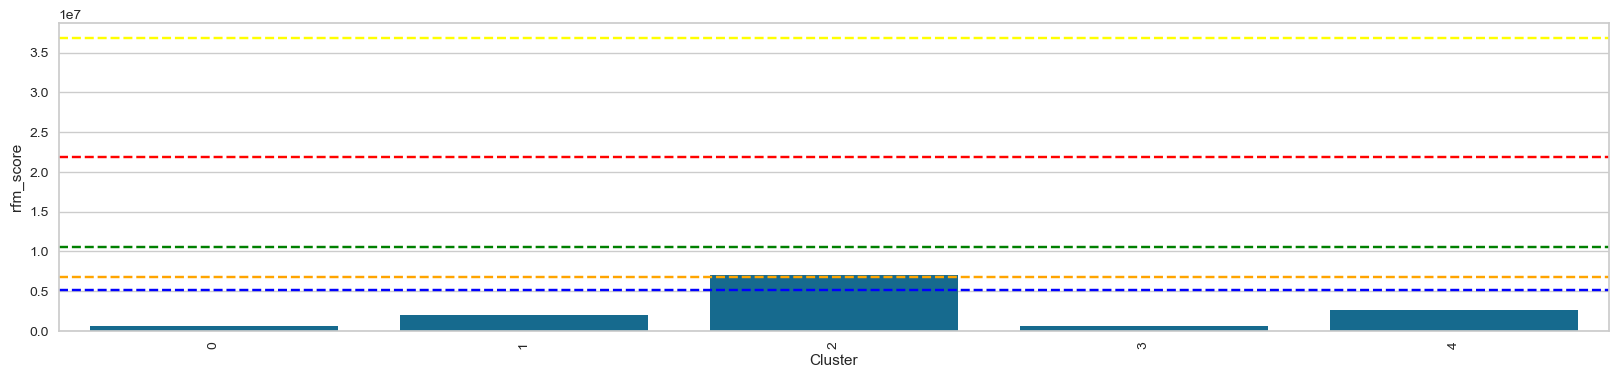

In [124]:
#수평선으로 각 세그먼트 별 최대값 확인
from collections import Counter
counter0 = Counter(rfm.loc[rfm['Cluster']==0,'rfm_score'])
max_freq0 = max(counter0.keys())

counter1 = Counter(rfm.loc[rfm['Cluster']==1,'rfm_score'])
max_freq1 = max(counter1.keys())

counter2 = Counter(rfm.loc[rfm['Cluster']==2,'rfm_score'])
max_freq2 = max(counter2.keys())

counter3 = Counter(rfm.loc[rfm['Cluster']==3,'rfm_score'])
max_freq3 = max(counter3.keys())

counter4 = Counter(rfm.loc[rfm['Cluster']==4,'rfm_score'])
max_freq4 = max(counter4.keys())

plt.figure(figsize=(20, 4))
plt.xticks(rotation=90) #글자 90%도 회전
#sns.barplot(data=rfm, x='RFM_segment',y='RFM_score')
plt.axhline(y=max_freq4, linestyle='--', color = 'red')
plt.axhline(y=max_freq3, linestyle='--', color = 'orange')
plt.axhline(y=max_freq2, linestyle='--', color = 'yellow')
plt.axhline(y=max_freq1, linestyle='--', color = 'green')
plt.axhline(y=max_freq0, linestyle='--', color = 'blue')
sns.barplot(data=rfm.sort_values('Cluster'), x='Cluster',y='rfm_score')
#rfm 세그먼트 별로 정리해서 확인
#max값은 군집2>군집4>군집1>군집3>군집4 순서로 작아짐.
#

In [149]:
#기존 일반고객부터 VIP04고객까지 나뉜 실제 데이터 시각화 비교
rfm2

,발급회원번호,Frequency,MonetaryValue,Duration,Cluster,VIP등급코드,rfm_score
0,SYN_0,127.0,3262344.0,12.0,1,07,1023776.0
1,SYN_1,174.0,5604157.0,12.0,1,_,1758657.0
2,SYN_2,29.0,757181.0,6.0,3,_,399489.0
3,SYN_3,40.0,468022.0,12.0,0,_,156025.0
4,SYN_4,30.0,673648.0,1.0,3,_,355418.0
...,...,...,...,...,...,...,...
2230792,SYN_2999991,454.0,5315944.0,12.0,1,_,1668308.0
2230793,SYN_2999996,458.0,5383214.0,12.0,1,07,1689419.0
2230794,SYN_2999997,287.0,9660844.0,12.0,1,_,3031690.0
2230795,SYN_2999998,182.0,3383113.0,12.0,1,_,1061692.0


In [ ]:
# RFM_class 와 Cluster 교차표
pd.crosstab(rfm['RFM_class'], rfm['Cluster'])
#각 군집별로 잘못 나뉜 (한등급 아래인) 고객들을 대상으로 등급 상향 프로모션을 진행해볼 수 있을 듯 하다.
#0번에는 주로 silver가 1번에는 주로 gold가 속해있다.


In [ ]:
#100개만 샘플링해서 그려도 너무 오래 걸려서 패스 
# pairplot( 오래 걸리기 때문에 rfm.sample() 일부만 그려보기)
# 모든 수치변수에 대해 짝을 지어 그래프를 그리기에 오래 걸린다.
#sns.pairplot(data=rfm.sample(100), hue='Cluster')

#R,F,M값과 0,1,2를 교차해서 확인했을 시
#RFM_score와 R열, F열, M열을 기준으로 확인했을 시 M에서 1과 2가 조금 겹치는 부분이 존재하지만
#어느정도 비슷하게 나뉘어져 있다고 볼 수 있다.

In [ ]:
#sns.pairplot(data=rfm.sample(100), hue='RFM_class')
#현재는 FRM 기법으로 나눴기 떄문에 확연히 나눠진다.
#이렇게 RFM기법으로 나눈것과 클러스터링으로 나눈 것의 차이를 확인할 수 있다.